In [1]:
import ROOT
from ROOT import TFile, TCanvas, TPad, TChain, TLegend
from ROOT import kGreen, kBlue, kRed, kBlack, kOrange, kGreen, kCyan, kMagenta, kAzure
from ROOT import TH1D, TVector3, TLorentzVector, TGraph, TMath, TFeldmanCousins
from functions.loadRDataFrame import RDF_to_pandas

import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import time

Welcome to JupyROOT 6.26/06


In [2]:
ROOT.EnableImplicitMT(40)

treename = "b"
#mydir1 = "/home/belle2/jcorrea/invisible_search/ntuples/pi_J0/signals/"
#mydir2 = "/home/belle2/jcorrea/invisible_search/ntuples/pi_J0/merged/"
mydir1 = "/hsm/belle2/bdata/users/jcorrea/invisible_search/ntuples/pi/signal/"
mydir2 = "/hsm/belle2/bdata/users/jcorrea/invisible_search/ntuples/pi/irreducible/"


# Bsig->pi+X  Btag->pi+D0 (D0->piK) 
HadronicTag_m00 = mydir1+"J0_m0.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m10 = mydir1+"J0_m1.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m20 = mydir1+"J0_m2.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m30 = mydir1+"J0_m3.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m40 = mydir1+"J0_m4.0/ntuple_HadronicTag_D_*.root"
HadronicTag_m50 = mydir1+"J0_m5.0/ntuple_HadronicTag_D_*.root"

# Bsig->pi+X  Btag->pi+D0* (D0*->D0+gamma (D0->K+pi)) 
HadronicTag_m00_Dstar_gamma = mydir1+"J0_m0.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m10_Dstar_gamma = mydir1+"J0_m1.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m20_Dstar_gamma = mydir1+"J0_m2.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m30_Dstar_gamma = mydir1+"J0_m3.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m40_Dstar_gamma = mydir1+"J0_m4.0/ntuple_HadronicTag_Dstar_gamma_*.root"
HadronicTag_m50_Dstar_gamma = mydir1+"J0_m5.0/ntuple_HadronicTag_Dstar_gamma_*.root"

# Bsig->pi+X  Btag->pi+D0* (D0*->D0+pi0 (D0->K+pi)) 
HadronicTag_m00_Dstar_pi0 = mydir1+"J0_m0.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m10_Dstar_pi0 = mydir1+"J0_m1.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m20_Dstar_pi0 = mydir1+"J0_m2.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m30_Dstar_pi0 = mydir1+"J0_m3.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m40_Dstar_pi0 = mydir1+"J0_m4.0/ntuple_HadronicTag_Dstar_pi0_*.root"
HadronicTag_m50_Dstar_pi0 = mydir1+"J0_m5.0/ntuple_HadronicTag_Dstar_pi0_*.root"



# Bsig->pi+X  Btag->l+nu+D0 (D0->pi+K)
SemilepTag_m00 = mydir1+"J0_m0.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m10 = mydir1+"J0_m1.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m20 = mydir1+"J0_m2.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m30 = mydir1+"J0_m3.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m40 = mydir1+"J0_m4.0/ntuple_SemilepTag_D_*.root"
SemilepTag_m50 = mydir1+"J0_m5.0/ntuple_SemilepTag_D_*.root"

# Bsig->pi+X  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
SemilepTag_m00_Dstar_gamma = mydir1+"J0_m0.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m10_Dstar_gamma = mydir1+"J0_m1.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m20_Dstar_gamma = mydir1+"J0_m2.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m30_Dstar_gamma = mydir1+"J0_m3.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m40_Dstar_gamma = mydir1+"J0_m4.0/ntuple_SemilepTag_Dstar_gamma_*.root"
SemilepTag_m50_Dstar_gamma = mydir1+"J0_m5.0/ntuple_SemilepTag_Dstar_gamma_*.root"

# Bsig->pi+X  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
SemilepTag_m00_Dstar_pi0 = mydir1+"J0_m0.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m10_Dstar_pi0 = mydir1+"J0_m1.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m20_Dstar_pi0 = mydir1+"J0_m2.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m30_Dstar_pi0 = mydir1+"J0_m3.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m40_Dstar_pi0 = mydir1+"J0_m4.0/ntuple_SemilepTag_Dstar_pi0_*.root"
SemilepTag_m50_Dstar_pi0 = mydir1+"J0_m5.0/ntuple_SemilepTag_Dstar_pi0_*.root"


# Bsig->bkg_charged  Btag->l+nu+D0 (D0->pi+K)
pi_charged_SemilepTag = mydir2+"pi_chargedFinal/ntuple_SemilepTag_D_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
pi_charged_SemilepTag_Dstar_gamma = mydir2+"pi_chargedFinal/ntuple_SemilepTag_Dstar_gamma_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
pi_charged_SemilepTag_Dstar_pi0 = mydir2+"pi_chargedFinal/ntuple_SemilepTag_Dstar_pi0_Full.root"


# Bsig->bkg_mixed   Btag->l+nu+D0+pi (D0->pi+K)
pi_mixed_SemilepTag_D0 = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D0_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D0*+pi (D0*->D0(->pi+K)+gamma)
pi_mixed_SemilepTag_D0star_gamma = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D0star_gamma_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D0*+pi (D0*->D0(->pi+K)+pi0)
pi_mixed_SemilepTag_D0star_pi0 = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D0star_pi0_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D0*++pi (D0*+->D0(->pi+K)+pi)
pi_mixed_SemilepTag_D_0 = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D_0_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D1'++pi (D1'+->D0*(->D0(K+pi)+gamma)+pi)
pi_mixed_SemilepTag_D1star_gamma = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D1star_gamma_Full.root"
# Bsig->bkg_mixed  Btag->l+nu+D1'++pi (D1'+->D0*(->D0(K+pi)+pi0)+pi)
pi_mixed_SemilepTag_D1star_pi0 = mydir2+"pi_mixedFinal/ntuple_SemilepTag_D1star_pi0_Full.root"


# Bsig->bkg_charged  Btag->l+nu+D0 (D0->pi+K)
pi_charged_HadronicTag = mydir2+"pi_chargedFinal/ntuple_HadronicTag_D_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+gamma)
pi_charged_HadronicTag_Dstar_gamma = mydir2+"pi_chargedFinal/ntuple_HadronicTag_Dstar_gamma_Full.root"
# Bsig->bkg_charged  Btag->l+nu+D0* (D0*->D0(->pi+K)+pi0)
pi_charged_HadronicTag_Dstar_pi0 = mydir2+"pi_chargedFinal/ntuple_HadronicTag_Dstar_pi0_Full.root"


#topoana semilep tag
topoana_SemilepTagD = mydir2+"pi_chargedFinal/topoana.root"



# Signal Dataframe
df_HadronicTag_m00 = ROOT.RDataFrame(treename, HadronicTag_m00)
df_HadronicTag_m10 = ROOT.RDataFrame(treename, HadronicTag_m10)
df_HadronicTag_m20 = ROOT.RDataFrame(treename, HadronicTag_m20)
df_HadronicTag_m30 = ROOT.RDataFrame(treename, HadronicTag_m30)
df_HadronicTag_m40 = ROOT.RDataFrame(treename, HadronicTag_m40)
df_HadronicTag_m50 = ROOT.RDataFrame(treename, HadronicTag_m50)

df_HadronicTag_m00_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m00_Dstar_gamma)
df_HadronicTag_m10_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m10_Dstar_gamma)
df_HadronicTag_m20_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m20_Dstar_gamma)
df_HadronicTag_m30_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m30_Dstar_gamma)
df_HadronicTag_m40_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m40_Dstar_gamma)
df_HadronicTag_m50_Dstar_gamma = ROOT.RDataFrame(treename, HadronicTag_m50_Dstar_gamma)

df_HadronicTag_m00_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m00_Dstar_pi0)
df_HadronicTag_m10_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m10_Dstar_pi0)
df_HadronicTag_m20_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m20_Dstar_pi0)
df_HadronicTag_m30_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m30_Dstar_pi0)
df_HadronicTag_m40_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m40_Dstar_pi0)
df_HadronicTag_m50_Dstar_pi0 = ROOT.RDataFrame(treename, HadronicTag_m50_Dstar_pi0)

df_SemilepTag_m00 = ROOT.RDataFrame(treename, SemilepTag_m00)
df_SemilepTag_m10 = ROOT.RDataFrame(treename, SemilepTag_m10)
df_SemilepTag_m20 = ROOT.RDataFrame(treename, SemilepTag_m20)
df_SemilepTag_m30 = ROOT.RDataFrame(treename, SemilepTag_m30)
df_SemilepTag_m40 = ROOT.RDataFrame(treename, SemilepTag_m40)
df_SemilepTag_m50 = ROOT.RDataFrame(treename, SemilepTag_m50)

df_SemilepTag_m00_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m00_Dstar_gamma)
df_SemilepTag_m10_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m10_Dstar_gamma)
df_SemilepTag_m20_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m20_Dstar_gamma)
df_SemilepTag_m30_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m30_Dstar_gamma)
df_SemilepTag_m40_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m40_Dstar_gamma)
df_SemilepTag_m50_Dstar_gamma = ROOT.RDataFrame(treename, SemilepTag_m50_Dstar_gamma)

df_SemilepTag_m00_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m00_Dstar_pi0)
df_SemilepTag_m10_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m10_Dstar_pi0)
df_SemilepTag_m20_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m20_Dstar_pi0)
df_SemilepTag_m30_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m30_Dstar_pi0)
df_SemilepTag_m40_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m40_Dstar_pi0)
df_SemilepTag_m50_Dstar_pi0 = ROOT.RDataFrame(treename, SemilepTag_m50_Dstar_pi0)



# BKG RDataframe semilep
df_pi_charged_SemilepTag = ROOT.RDataFrame(treename, pi_charged_SemilepTag)
df_pi_charged_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, pi_charged_SemilepTag_Dstar_gamma)
df_pi_charged_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, pi_charged_SemilepTag_Dstar_pi0)

df_pi_mixed_SemilepTag_D0 = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D0)
df_pi_mixed_SemilepTag_D_0 = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D_0)
df_pi_mixed_SemilepTag_D0star_gamma = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D0star_gamma)
df_pi_mixed_SemilepTag_D0star_pi0 = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D0star_pi0)
df_pi_mixed_SemilepTag_D1star_gamma = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D1star_gamma)
df_pi_mixed_SemilepTag_D1star_pi0 = ROOT.RDataFrame(treename, pi_mixed_SemilepTag_D1star_pi0)

# BKG RDataframe Hadronic
df_pi_charged_HadronicTag = ROOT.RDataFrame(treename, pi_charged_HadronicTag)
df_pi_charged_HadronicTag_Dstar_gamma = ROOT.RDataFrame(treename, pi_charged_HadronicTag_Dstar_gamma)
df_pi_charged_HadronicTag_Dstar_pi0 = ROOT.RDataFrame(treename, pi_charged_HadronicTag_Dstar_pi0)


#topoana
df_topoana_SemilepTagD = ROOT.RDataFrame(treename, topoana_SemilepTagD)
'''
bkg_names_1 = ROOT.std.vector('string')()
for n in [pi_charged_SemilepTag, pi_mixed_SemilepTag]: bkg_names_1.push_back(n)
df_bkg_SemilepTag = ROOT.RDataFrame(treename, bkg_names_1)


bkg_names_2 = ROOT.std.vector('string')()
for n in [pi_charged_SemilepTag_Dstar_gamma, pi_mixed_SemilepTag_Dstar_gamma]: bkg_names_2.push_back(n)
df_bkg_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, bkg_names_2)


bkg_names_3 = ROOT.std.vector('string')()
for n in [pi_charged_SemilepTag_Dstar_pi0, pi_mixed_SemilepTag_Dstar_pi0]: bkg_names_3.push_back(n)
df_bkg_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, bkg_names_3)'''


"\nbkg_names_1 = ROOT.std.vector('string')()\nfor n in [pi_charged_SemilepTag, pi_mixed_SemilepTag]: bkg_names_1.push_back(n)\ndf_bkg_SemilepTag = ROOT.RDataFrame(treename, bkg_names_1)\n\n\nbkg_names_2 = ROOT.std.vector('string')()\nfor n in [pi_charged_SemilepTag_Dstar_gamma, pi_mixed_SemilepTag_Dstar_gamma]: bkg_names_2.push_back(n)\ndf_bkg_SemilepTag_Dstar_gamma = ROOT.RDataFrame(treename, bkg_names_2)\n\n\nbkg_names_3 = ROOT.std.vector('string')()\nfor n in [pi_charged_SemilepTag_Dstar_pi0, pi_mixed_SemilepTag_Dstar_pi0]: bkg_names_3.push_back(n)\ndf_bkg_SemilepTag_Dstar_pi0 = ROOT.RDataFrame(treename, bkg_names_3)"

In [3]:
def calculateMminMmax(mom_tag,mom_sig,Ecms):
    
    accepted = True
    CMS_E = Ecms
    B_m = 5.27934
    
    x0 = (B_m/CMS_E)*(B_m/CMS_E)
    
    pa = TLorentzVector()
    pb = TLorentzVector()

    pa = mom_tag
    pb = mom_sig
    n_a = TVector3()
    n_b = TVector3()
    n_a = (1.0/CMS_E)*pa.Vect()
    n_b = (1.0/CMS_E)*pb.Vect()
    ab = n_a.Dot(n_b)
        
    za = pa.E()/CMS_E
    zb = pb.E()/CMS_E
        
    a2 = n_a.Mag2()
    b2 = n_b.Mag2()
        
    wa = (zb*zb - zb - b2 - 2*ab)
    wb = (za*za - za + a2)
        
    H = TVector3()
    H = wa*n_a + wb*n_b; 

    acrossb = TVector3()
    acrossb = n_a.Cross(n_b)
            
    A1 = b2
    A2 = a2
    A3 = 2.0*ab
    B1 = 2.0*(n_b.Dot(H))
    B2 = 2.0*(n_a.Dot(H))
    C1 = 4.0*acrossb.Mag2()
    D1 = H.Dot(H) -C1*(0.5 - za)*(0.5 - za)
    #A = A1 + A2 + A3
    #B = B1 + B2
    #C = D1
    A = A1
    B = -B1 + C1 -2*A1*x0 - A3*x0
    C = A3*x0*x0 + A2*x0*x0 + A1*x0*x0 + B2*x0 + B1*x0 + D1
    
    
    if (B*B - 4.0*A*C) < 0 : 
        accepted = False
        Mmin2 = 1000
        Mmax2 = 1000
    else :
        accepted = True
        Mmax2 = CMS_E*CMS_E*(-B + np.sqrt(B*B - 4*A*C))/(2*A)
        Mmin2 = CMS_E*CMS_E*(-B - np.sqrt(B*B - 4*A*C))/(2*A)  
        
    return accepted, Mmin2, Mmax2

In [4]:
def ArgusPsR(p_b,p_a, Ecms):
    #accepted = True
    CMS_E = Ecms
    E_B = CMS_E/2.0
    M_B = 5.27934

    pa = TLorentzVector()
    pb = TLorentzVector()
    pa_boost = TLorentzVector()
    boostPS = TVector3()

    pa = p_a
    pb = p_b

    P_B = np.sqrt(E_B*E_B - M_B*M_B)
    betav = P_B/E_B

    # Boosting of pion in the signal side to the B restframe with following approximation
    # a) the momentum direction of the B in the 1-prong side as the opposite direction of the momentum of the D0+l in the three-prong side
    # b) the B energy by ECMS/2
    boostPS = betav*(pb.BoostVector().Unit())
    pa.Boost(boostPS)

    Ea_boost = pa.E()

    Xval = (2.0*Ea_boost)/M_B

    return Xval

In [5]:
def P_smearing(P, perc):
    # Let's create the detector effect (smearing 5% around in momenta)
    pX_CMS = P.Px()
    pY_CMS = P.Py()
    pZ_CMS = P.Pz()
    p_ECMS = P.Energy()

    pt_cms = (pX_CMS**2 + pY_CMS**2 + pZ_CMS**2)**0.5 # Calculate transverse momentum
    sigma_pt = perc * pt_cms  # Standard deviation of 1% of transverse momentum

            # Applying smearing using a Gaussian distribution with mean = 1 and standard deviation = sigma_pt
    pX_CMS_smeared = pX_CMS * (1.0 + random.gauss(0,sigma_pt))
    pY_CMS_smeared = pY_CMS * (1.0 + random.gauss(0,sigma_pt))
    pZ_CMS_smeared = pZ_CMS * (1.0 + random.gauss(0,sigma_pt))

    return pX_CMS_smeared, pY_CMS_smeared, pZ_CMS_smeared, p_ECMS

In [6]:
def add_q2(Ecms, px, py, pz):
    """
    Analisis based on B+ -> K+ nunu
    Formula found in next link, page: 28:
    https://docs.belle2.org/record/3785/files/BELLE2-TALK-DRAFT-2023-117.pdf
    """

    # Mass of the pi
    m_sig = 0.13957039
    s = Ecms**2

    pt_cms = (px**2 + py**2 + pz**2)**0.5
    Esig_CMS = (m_sig**2 + pt_cms**2)**0.5

    q2 = s/4 + m_sig**2 - np.sqrt(s)*Esig_CMS

    return q2

In [7]:
def RDtoPandas(df, flag, cut=None, columns=None, topoana=None):
    
    if cut: df = df.Filter(cut)
    else: df = df
    
    if topoana: df = df.Filter(topoana)
    else: df = df

    if columns: npdf = df.AsNumpy(columns=columns)
    else: npdf = df.AsNumpy()

    

    data = pd.DataFrame(npdf)
    
    
    Mmin2_list = []
    Mmax2_list = []
    Xval_list = []
    q2_list = []
    # Change the name of columns with the porpuse of unified or momenta names
    if "Dstar_tag_CMS_mcE" and "Dstar_tag_CMS_mcPX" and "Dstar_tag_CMS_mcPY" and "Dstar_tag_CMS_mcPZ" in data.columns:
        #data=data.rename(columns = {'Dstar_tag_CMS_mcE':'track1_tag_CMS_mcE', 'Dstar_tag_CMS_mcPX': 'track1_tag_CMS_mcPX', 
         #                           'Dstar_tag_CMS_mcPY': 'track1_tag_CMS_mcPY', 'Dstar_tag_CMS_mcPZ':'track1_tag_CMS_mcPZ' })
        
        for row in range(len(data.index)):

            pa = TLorentzVector()
            ptrack1_tag = TLorentzVector()
            ptrack2_tag = TLorentzVector()
            #ptrack3_tag = TLorentzVector()
            
            #pb = TLorentzVector()

            pa.SetPxPyPzE(float(data.at[row, "track_sig_CMS_mcPX"]),
                        float(data.at[row, "track_sig_CMS_mcPY"]),
                        float(data.at[row, "track_sig_CMS_mcPZ"]),
                        float(data.at[row, "track_sig_CMS_mcE"]))
            
            ptrack1_tag.SetPxPyPzE(float(data.at[row, "Dstar_tag_CMS_mcPX"]),
                                float(data.at[row, "Dstar_tag_CMS_mcPY"]),
                                float(data.at[row, "Dstar_tag_CMS_mcPZ"]),
                                float(data.at[row, "Dstar_tag_CMS_mcE"]))
            
            ptrack2_tag.SetPxPyPzE(float(data.at[row, "track_tag_CMS_mcPX"]),
                                float(data.at[row, "track_tag_CMS_mcPY"]),
                                float(data.at[row, "track_tag_CMS_mcPZ"]),
                                float(data.at[row, "track_tag_CMS_mcE"]))
            
            '''D_CMS_PX = float(data.at[row, "D_tag_CMS_mcPX"])
            D_CMS_PY = float(data.at[row, "D_tag_CMS_mcPY"])
            D_CMS_PZ = float(data.at[row, "D_tag_CMS_mcPZ"])
            D_CMS_E = float(data.at[row, "D_tag_CMS_mcE"])
                            
            lep_CMS_PX = float(data.at[row, "track_tag_CMS_mcPX"]) 
            lep_CMS_PY = float(data.at[row, "track_tag_CMS_mcPY"])
            lep_CMS_PZ = float(data.at[row, "track_tag_CMS_mcPZ"])
            lep_CMS_E = float(data.at[row, "track_tag_CMS_mcE"])
                            
            PbX = D_CMS_PX + lep_CMS_PX
            PbY = D_CMS_PY + lep_CMS_PY
            PbZ = D_CMS_PZ + lep_CMS_PZ
            PbE = D_CMS_E + lep_CMS_E
                            
            pb.SetPxPyPzE(PbX, PbY, PbZ, PbE)'''                 
                            
            
            #pb = ptrack1_tag  + ptrack2_tag #+ ptrack3_tag
            
            # Let's smearing the momenta of the tracks wirh a 1% of smearing
            PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS = P_smearing(pa, perc=0.01)
            Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS = P_smearing(ptrack1_tag , perc=0.01)
            Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS = P_smearing(ptrack2_tag , perc=0.01)

            P_a = TLorentzVector()
            P_b = TLorentzVector()
            P_track1 = TLorentzVector()
            P_track2 = TLorentzVector()
            
            P_a.SetPxPyPzE(PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS)
            P_track1.SetPxPyPzE(Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS)
            P_track2.SetPxPyPzE(Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS)

           

            P_b = P_track1 + P_track2
        
            '''pb.SetPxPyPzE(float(data.at[row, "track_tag_px_CMS"]),
                        float(data.at[row, "track_tag_py_CMS"]),
                        float(data.at[row, "track_tag_pz_CMS"]),
                        float(data.at[row, "track_tag_E_CMS"]))'''

            #Ecms = 10.58 
            Ecms = float(data.at[row, "Ecms"])

            q2Val = add_q2(Ecms, PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared)
            
            if flag==1:
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            else:
                flagFOMS, Mmin2, Mmax2 = calculateMminMmax(P_a,P_b,Ecms)
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Mmin2_list.append(float(Mmin2))
                Mmax2_list.append(float(Mmax2))
                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            

            
    else:
        for row in range(len(data.index)):

            pa = TLorentzVector()
            ptrack1_tag = TLorentzVector()
            ptrack2_tag = TLorentzVector()
            #ptrack3_tag = TLorentzVector()
            
            pb = TLorentzVector()

            pa.SetPxPyPzE(float(data.at[row, "track_sig_CMS_mcPX"]),
                        float(data.at[row, "track_sig_CMS_mcPY"]),
                        float(data.at[row, "track_sig_CMS_mcPZ"]),
                        float(data.at[row, "track_sig_CMS_mcE"]))
            
            ptrack1_tag.SetPxPyPzE(float(data.at[row, "D_tag_CMS_mcPX"]),
                                float(data.at[row, "D_tag_CMS_mcPY"]),
                                float(data.at[row, "D_tag_CMS_mcPZ"]),
                                float(data.at[row, "D_tag_CMS_mcE"]))
            
            ptrack2_tag.SetPxPyPzE(float(data.at[row, "track_tag_CMS_mcPX"]),
                                float(data.at[row, "track_tag_CMS_mcPY"]),
                                float(data.at[row, "track_tag_CMS_mcPZ"]),
                                float(data.at[row, "track_tag_CMS_mcE"]))
            
            '''D_CMS_PX = float(data.at[row, "D_tag_CMS_mcPX"])
            D_CMS_PY = float(data.at[row, "D_tag_CMS_mcPY"])
            D_CMS_PZ = float(data.at[row, "D_tag_CMS_mcPZ"])
            D_CMS_E = float(data.at[row, "D_tag_CMS_mcE"])
                            
            lep_CMS_PX = float(data.at[row, "track_tag_CMS_mcPX"]) 
            lep_CMS_PY = float(data.at[row, "track_tag_CMS_mcPY"])
            lep_CMS_PZ = float(data.at[row, "track_tag_CMS_mcPZ"])
            lep_CMS_E = float(data.at[row, "track_tag_CMS_mcE"])
                            
            PbX = D_CMS_PX + lep_CMS_PX
            PbY = D_CMS_PY + lep_CMS_PY
            PbZ = D_CMS_PZ + lep_CMS_PZ
            PbE = D_CMS_E + lep_CMS_E
                            
            pb.SetPxPyPzE(PbX, PbY, PbZ, PbE)'''                 
                            
            
            #pb = ptrack1_tag  + ptrack2_tag #+ ptrack3_tag
            
        
            '''pb.SetPxPyPzE(float(data.at[row, "track_tag_px_CMS"]),
                        float(data.at[row, "track_tag_py_CMS"]),
                        float(data.at[row, "track_tag_pz_CMS"]),
                        float(data.at[row, "track_tag_E_CMS"]))'''

            # Let's smearing the momenta of the tracks wirh a 1% of smearing
            PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS = P_smearing(pa, perc=0.01)
            Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS = P_smearing(ptrack1_tag , perc=0.01)
            Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS = P_smearing(ptrack2_tag , perc=0.01)

            P_a = TLorentzVector()
            P_b = TLorentzVector()
            P_track1 = TLorentzVector()
            P_track2 = TLorentzVector()
            
            P_a.SetPxPyPzE(PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared, Pa_ECMS)
            P_track1.SetPxPyPzE(Ptrack1X_CMS_smeared, Ptrack1Y_CMS_smeared, Ptrack1Z_CMS_smeared, Ptrack1_ECMS)
            P_track2.SetPxPyPzE(Ptrack2X_CMS_smeared, Ptrack2Y_CMS_smeared, Ptrack2Z_CMS_smeared, Ptrack2_ECMS)

            

            P_b = P_track1 + P_track2
            
            #Ecms = 10.58 
            Ecms = float(data.at[row, "Ecms"])

            q2Val = add_q2(Ecms, PaX_CMS_smeared, PaY_CMS_smeared, PaZ_CMS_smeared)
            
            if flag==1:
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
            else:
                flagFOMS, Mmin2, Mmax2 = calculateMminMmax(P_a,P_b,Ecms)
                Xval = ArgusPsR(P_b,P_a,Ecms)

                Mmin2_list.append(float(Mmin2))
                Mmax2_list.append(float(Mmax2))
                Xval_list.append(float(Xval))
                q2_list.append(float(q2Val))
    


    # Using 'Mmin2' and 'Mmax2' as the column name and equating it to the list

    if flag==1:
        data['Xps'] = Xval_list
        data['q2'] = q2_list
    else:
        data['Mmin2'] = Mmin2_list
        data['Mmax2'] = Mmax2_list
        data['Xps'] = Xval_list
        data['q2'] = q2_list
    
    
    return data

In [8]:
def ReScale(df, fraction=None):
    #df_new = df.query(cut).reset_index()
    if fraction: 
        if (fraction >1):
            pdf = df.sample(frac=fraction, replace=True, random_state=1)
        else:
            pdf = df.sample(frac=fraction, random_state=1)
    else: pdf = df
    return pdf

In [9]:
baseCut = f'nEta == 0 && nEtaPrime == 0 && (nTracks_ == 4 || nTracks_ == 6)' # The cut nPi0 is done in the reconstruction process
baseCut+= ' && track_sig_genMotherPDG != 130 && track_tag_genMotherPDG != 130 && pi_tag_genMotherPDG != 130'

# Individual cuts
D_Mass_Cut = 'D_tag_M > 1.83 && D_tag_M < 1.89'   # D0mass = 1.864
B_Mass_htag_Cut = 'B_tag_M > 5.27 && B_tag_M < 5.29'   # B+mass = 5.280
B_Mass_stag_Cut = 'B_tag_M < 5.29'
Dstar_Mass_Cut  = 'Dstar_tag_M > 1.98 && Dstar_tag_M < 2.03'  # D*0mass = 2.007
B_tag_CMS_mcP_Cut = 'B_tag_CMS_mcP > 0.2 && B_tag_CMS_mcP < 0.45'
B_tag_lab_mcP_Cut = 'B_tag_mcP > 1.0'
track_sig_dr_Cut  = 'track_sig_dr < 0.5' 
track_tag_dr_Cut  = 'track_tag_dr < 0.5' 
photonsEnergyCMS_Cut = 'genTotalPhotonsEnergyOfEvent < 1.5'
B_tag_cosAngleCMSDaughters_Cut = 'B_tag_cosAngleCMS_daughters < -0.95'

invM_track_sig_D_tag_Cut = '(invM_track_sig_D_tag < 2.00 || invM_track_sig_D_tag > 2.02) && '
invM_track_sig_D_tag_Cut+= '(invM_track_sig_D_tag < 2.40 || invM_track_sig_D_tag > 2.50)'

# General cuts by Tag
# Hadronic tag
optCut_htag = f'{baseCut} && {D_Mass_Cut} && {B_Mass_htag_Cut} && {B_tag_CMS_mcP_Cut} && {track_sig_dr_Cut} && {photonsEnergyCMS_Cut} && {B_tag_cosAngleCMSDaughters_Cut}'
# Semilep tag
optCut_stag = f'{baseCut} && {D_Mass_Cut} && {B_Mass_stag_Cut} && {B_tag_CMS_mcP_Cut} && {track_sig_dr_Cut} && {track_tag_dr_Cut} && {photonsEnergyCMS_Cut} && {B_tag_lab_mcP_Cut}'
optCut_stag+= f' && {invM_track_sig_D_tag_Cut}'

optCut_htag_Dstar = f'{optCut_htag} && {Dstar_Mass_Cut}'
optCut_stag_Dstar = f'{optCut_stag} && {Dstar_Mass_Cut} && (invM_track_sig_Dstar_tag < 2.39 || invM_track_sig_Dstar_tag > 2.51)'

# perfect PID
partial_matchCut = 'abs(track_sig_mcPDG) == 211 && abs(pi_tag_mcPDG) == 211 && abs(K_tag_mcPDG) == 321'
partial_matchCut_htag = f'{partial_matchCut} && abs(track_tag_mcPDG) == 211'
partial_matchCut_stag = f'{partial_matchCut} && (abs(track_tag_mcPDG)== 11 || abs(track_tag_mcPDG)==13)'

# Matching Cuts
matchCut_htag = f'{partial_matchCut_htag} && abs(track_sig_genMotherPDG) == 521'
matchCut_stag = f'{partial_matchCut_stag} && abs(track_sig_genMotherPDG) == 521'

signal_htag = f'{matchCut_htag} && {optCut_htag}'
signal_htag_Dstar = f'{matchCut_htag} && {optCut_htag_Dstar}'
signal_stag = f'{matchCut_stag} && {optCut_stag}'
signal_stag_Dstar = f'{matchCut_stag} && {optCut_stag_Dstar}'

bkg_htag = f'{partial_matchCut_htag} && {optCut_htag}'
bkg_htag_Dstar = f'{partial_matchCut_htag} && {optCut_htag_Dstar}'
bkg_stag = f'{partial_matchCut_stag} && {optCut_stag}'
bkg_stag_Dstar = f'{partial_matchCut_stag} && {optCut_stag_Dstar}'

In [10]:
cols=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcE","track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "D_tag_CMS_mcE","D_tag_CMS_mcPX",
      "D_tag_CMS_mcPY", "D_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "pi_tag_mcPDG", "Ecms",
      "invM_track_sig_D_tag"]

cols_bkg=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcE","track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "D_tag_CMS_mcE","D_tag_CMS_mcPX",
      "D_tag_CMS_mcPY", "D_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "pi_tag_mcPDG", "Ecms",
      "invM_track_sig_D_tag", "iDcyBrP_50_0","iDcyBrCcP_50_0"]

cols_Dstar=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "Dstar_tag_CMS_mcE","Dstar_tag_CMS_mcPX",
      "Dstar_tag_CMS_mcPY", "Dstar_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "Dstar_tag_M", "invM_track_sig_Dstar_tag",
      "Ecms", "pi_tag_mcPDG", "track_sig_CMS_mcE", "invM_track_sig_D_tag"]

cols_Dstar_bkg=["nEta", "nEtaPrime","nTracks_", "nTracks_", "track_sig_genMotherPDG", "track_tag_genMotherPDG", "pi_tag_genMotherPDG",
      "D_tag_M","B_tag_M", "B_tag_CMS_mcP", "B_tag_mcP", "track_sig_dr", "track_tag_dr", "genTotalPhotonsEnergyOfEvent", "B_tag_cosAngleCMS_daughters",
      "track_sig_mcPDG", "K_tag_mcPDG", "track_tag_mcPDG", "track_sig_CMS_mcPX", "track_sig_CMS_mcPY", "track_sig_CMS_mcPZ", "Dstar_tag_CMS_mcE","Dstar_tag_CMS_mcPX",
      "Dstar_tag_CMS_mcPY", "Dstar_tag_CMS_mcPZ", "track_tag_CMS_mcE", "track_tag_CMS_mcPX", "track_tag_CMS_mcPY", "track_tag_CMS_mcPZ", "Dstar_tag_M", "invM_track_sig_Dstar_tag",
      "Ecms", "pi_tag_mcPDG", "track_sig_CMS_mcE", "invM_track_sig_D_tag", "iDcyBrP_50_0", "iDcyBrCcP_50_0"]




In [11]:

# Reducible Bkg without nn and KoL
# SemilepTag D
irr_charged_Semileptag_D = '((iDcyBrP_50_0 == 2 || iDcyBrCcP_50_0 == 2) || (iDcyBrP_50_0 == 26 || iDcyBrCcP_50_0 == 26) || (iDcyBrP_50_0 == 27 || iDcyBrCcP_50_0 == 27) \
                    || (iDcyBrP_50_0 == 9 || iDcyBrCcP_50_0 == 9) || (iDcyBrP_50_0 == 20 || iDcyBrCcP_50_0 == 20))'

neg_irr_charged_Semileptag_D = f' ! {irr_charged_Semileptag_D}'

# SemilepTag Dstar Gamma
irr_charged_Semileptag_Dstar_gamma = ' ((iDcyBrP_50_0 == 3 || iDcyBrCcP_50_0 == 3) || (iDcyBrP_50_0 == 18 || iDcyBrCcP_50_0 == 18) || (iDcyBrP_50_0 == 24 || iDcyBrCcP_50_0 == 24) \
             || (iDcyBrP_50_0 == 19 || iDcyBrCcP_50_0 == 19) || (iDcyBrP_50_0 == 29 || iDcyBrCcP_50_0 == 29))'

neg_irr_charged_Semileptag_Dstar_gamma = f' ! {irr_charged_Semileptag_Dstar_gamma}'

# SemilepTag Dstar pi0
irr_charged_Semileptag_Dstar_pi0 = ' ((iDcyBrP_50_0 == 2 || iDcyBrCcP_50_0 == 2) || (iDcyBrP_50_0 == 16 || iDcyBrCcP_50_0 == 16) || (iDcyBrP_50_0 == 15 || iDcyBrCcP_50_0 == 15) \
             || (iDcyBrP_50_0 == 17 || iDcyBrCcP_50_0 == 17) || (iDcyBrP_50_0 == 12 || iDcyBrCcP_50_0 == 12))'

neg_irr_charged_Semileptag_Dstar_pi0 = f' ! {irr_charged_Semileptag_Dstar_pi0}'


# HadTag D
irr_charged_Hadtag_D = ' ((iDcyBrP_50_0 == 2 || iDcyBrCcP_50_0 == 2) || (iDcyBrP_50_0 == 16 || iDcyBrCcP_50_0 == 16) || (iDcyBrP_50_0 == 15 || iDcyBrCcP_50_0 == 15) \
                 || (iDcyBrP_50_0 == 32 || iDcyBrCcP_50_0 == 32) || (iDcyBrP_50_0 == 13 || iDcyBrCcP_50_0 == 13))'

neg_irr_charged_Hadtag_D = f' ! {irr_charged_Hadtag_D}'

# HadTag Dstar Gamma
irr_charged_Hadtag_Dstar_gamma = ' ((iDcyBrP_50_0 == 2 || iDcyBrCcP_50_0 == 2) || (iDcyBrP_50_0 == 15 || iDcyBrCcP_50_0 == 15) || (iDcyBrP_50_0 == 29 || iDcyBrCcP_50_0 == 29) \
                    || (iDcyBrP_50_0 == 23 || iDcyBrCcP_50_0 == 23) || (iDcyBrP_50_0 == 24 || iDcyBrCcP_50_0 == 24))'

neg_irr_charged_Hadtag_Dstar_gamma = f' ! {irr_charged_Hadtag_Dstar_gamma}'

# HadTag Dstar pi0
irr_charged_Hadtag_Dstar_pi0 = ' ((iDcyBrP_50_0 == 1 || iDcyBrCcP_50_0 == 1) || (iDcyBrP_50_0 == 13 || iDcyBrCcP_50_0 == 13) || (iDcyBrP_50_0 == 18 || iDcyBrCcP_50_0 == 18) \
            || (iDcyBrP_50_0 == 31 || iDcyBrCcP_50_0 == 31) || (iDcyBrP_50_0 == 24 || iDcyBrCcP_50_0 == 24))'

neg_irr_charged_Hadtag_Dstar_pi0 = f' ! {irr_charged_Hadtag_Dstar_pi0}'

In [12]:
pi_charged_HadronicTag_sample = RDtoPandas(df_pi_charged_HadronicTag, flag= 1, columns=cols)
pi_charged_HadronicTag_irr_sample = RDtoPandas(df_pi_charged_HadronicTag, flag= 1, columns=cols, topoana=irr_charged_Hadtag_D)
pi_charged_HadronicTag_red_sample = RDtoPandas(df_pi_charged_HadronicTag, flag= 1, columns=cols, topoana=neg_irr_charged_Hadtag_D)

In [13]:
print(len(pi_charged_HadronicTag_sample))
print(len(pi_charged_HadronicTag_irr_sample))
print(len(pi_charged_HadronicTag_red_sample))

119083
32253
86830


In [14]:
red_frac = 0.6

pi_charged_HadronicTag_red_sample = ReScale(pi_charged_HadronicTag_red_sample, red_frac)
print(len(pi_charged_HadronicTag_red_sample))

52098


In [15]:
# Construct Pandas dataframes, flag:1 is for hadronic tag and flag:2 is for semilep tag

HadronicTag_m00_wc_df = RDtoPandas(df_HadronicTag_m00, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m10_wc_df = RDtoPandas(df_HadronicTag_m10, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m20_wc_df = RDtoPandas(df_HadronicTag_m20, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m30_wc_df = RDtoPandas(df_HadronicTag_m30, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m40_wc_df = RDtoPandas(df_HadronicTag_m40, flag= 1, cut=signal_htag, columns=cols)
HadronicTag_m50_wc_df = RDtoPandas(df_HadronicTag_m50, flag= 1, cut=signal_htag, columns=cols)

HadronicTag_m00_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m00_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m10_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m10_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m20_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m20_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m30_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m30_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m40_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m40_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m50_Dstar_gamma_wc_df = RDtoPandas(df_HadronicTag_m50_Dstar_gamma, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)

HadronicTag_m00_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m00_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m10_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m10_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m20_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m20_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m30_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m30_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m40_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m40_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)
HadronicTag_m50_Dstar_pi0_wc_df = RDtoPandas(df_HadronicTag_m50_Dstar_pi0, flag= 1, cut=signal_htag_Dstar, columns=cols_Dstar)

SemilepTag_m00_wc_df = RDtoPandas(df_SemilepTag_m00, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m10_wc_df = RDtoPandas(df_SemilepTag_m10, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m20_wc_df = RDtoPandas(df_SemilepTag_m20, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m30_wc_df = RDtoPandas(df_SemilepTag_m30, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m40_wc_df = RDtoPandas(df_SemilepTag_m40, flag= 2, cut=signal_stag, columns=cols)
SemilepTag_m50_wc_df = RDtoPandas(df_SemilepTag_m50, flag= 2, cut=signal_stag, columns=cols)

SemilepTag_m00_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m00_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m10_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m10_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m20_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m20_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m30_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m30_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m40_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m40_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m50_Dstar_gamma_wc_df = RDtoPandas(df_SemilepTag_m50_Dstar_gamma, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)

SemilepTag_m00_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m00_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m10_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m10_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m20_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m20_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m30_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m30_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m40_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m40_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)
SemilepTag_m50_Dstar_pi0_wc_df = RDtoPandas(df_SemilepTag_m50_Dstar_pi0, flag= 2, cut=signal_stag_Dstar, columns=cols_Dstar)


# "irr" significa que no podemos reducir con cortes de detector como ECL y KLM
pi_charged_HadronicTag_irr_wc_df = RDtoPandas(df_pi_charged_HadronicTag, flag= 1, cut=bkg_htag, columns=cols_bkg, topoana=irr_charged_Hadtag_D)
pi_charged_HadronicTag_Dstar_gamma_irr_wc_df = RDtoPandas(df_pi_charged_HadronicTag_Dstar_gamma, flag= 1, cut=bkg_htag_Dstar, columns=cols_Dstar_bkg, topoana=irr_charged_Hadtag_Dstar_gamma)
pi_charged_HadronicTag_Dstar_pi0_irr_wc_df = RDtoPandas(df_pi_charged_HadronicTag_Dstar_pi0, flag= 1, cut=bkg_htag_Dstar, columns=cols_Dstar_bkg, topoana=irr_charged_Hadtag_Dstar_pi0)

pi_charged_SemilepTag_irr_wc_df = RDtoPandas(df_pi_charged_SemilepTag, flag= 2, cut=bkg_stag, columns=cols_bkg, topoana=irr_charged_Semileptag_D)
pi_charged_SemilepTag_Dstar_gamma_irr_wc_df = RDtoPandas(df_pi_charged_SemilepTag_Dstar_gamma, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=irr_charged_Semileptag_Dstar_gamma)
pi_charged_SemilepTag_Dstar_pi0_irr_wc_df = RDtoPandas(df_pi_charged_SemilepTag_Dstar_pi0, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=irr_charged_Semileptag_Dstar_pi0)


# "red" significa ruidos que vamos a reducir al 40%
pi_charged_HadronicTag_red_wc_df = RDtoPandas(df_pi_charged_HadronicTag, flag= 1, cut=bkg_htag, columns=cols_bkg, topoana=neg_irr_charged_Hadtag_D)
pi_charged_HadronicTag_Dstar_gamma_red_wc_df = RDtoPandas(df_pi_charged_HadronicTag_Dstar_gamma, flag= 1, cut=bkg_htag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_charged_Hadtag_Dstar_gamma)
pi_charged_HadronicTag_Dstar_pi0_red_wc_df = RDtoPandas(df_pi_charged_HadronicTag_Dstar_pi0, flag= 1, cut=bkg_htag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_charged_Hadtag_Dstar_pi0)

pi_charged_SemilepTag_red_wc_df = RDtoPandas(df_pi_charged_SemilepTag, flag= 2, cut=bkg_stag, columns=cols_bkg, topoana=neg_irr_charged_Semileptag_D)
pi_charged_SemilepTag_Dstar_gamma_red_wc_df = RDtoPandas(df_pi_charged_SemilepTag_Dstar_gamma, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_charged_Semileptag_Dstar_gamma)
pi_charged_SemilepTag_Dstar_pi0_red_wc_df = RDtoPandas(df_pi_charged_SemilepTag_Dstar_pi0, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg, topoana=neg_irr_charged_Semileptag_Dstar_pi0)


# para mixed todos los ruidos son reducibles
pi_mixed_SemilepTag_D0_red_wc_df = RDtoPandas(df_pi_mixed_SemilepTag_D0, flag= 2, cut=bkg_stag, columns=cols_bkg)
pi_mixed_SemilepTag_D_0_red_wc_df = RDtoPandas(df_pi_mixed_SemilepTag_D_0, flag= 2, cut=bkg_stag, columns=cols_bkg)
pi_mixed_SemilepTag_D0star_gamma_red_wc_df = RDtoPandas(df_pi_mixed_SemilepTag_D0star_gamma, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg)

pi_mixed_SemilepTag_D0star_pi0_red_wc_df = RDtoPandas(df_pi_mixed_SemilepTag_D0star_pi0, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg)
pi_mixed_SemilepTag_D1star_gamma_red_wc_df = RDtoPandas(df_pi_mixed_SemilepTag_D1star_gamma, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg)
pi_mixed_SemilepTag_D1star_pi0_red_wc_df = RDtoPandas(df_pi_mixed_SemilepTag_D1star_pi0, flag= 2, cut=bkg_stag_Dstar, columns=cols_Dstar_bkg)



#topoana_SemilepTagD_wc_df = RDtoPandas(df_topoana_SemilepTagD, flag= 2, cut=bkg_stag)

In [16]:
# re escalando los ruidos reducibles, nos quedamos con el 60% de los ruidos
#red_frac = 0.6
red_frac = 1

pi_charged_HadronicTag_red_wc_df = ReScale(pi_charged_HadronicTag_red_wc_df, red_frac)
pi_charged_HadronicTag_Dstar_gamma_red_wc_df = ReScale(pi_charged_HadronicTag_Dstar_gamma_red_wc_df, red_frac)
pi_charged_HadronicTag_Dstar_pi0_red_wc_df = ReScale(pi_charged_HadronicTag_Dstar_pi0_red_wc_df, red_frac)

pi_charged_SemilepTag_red_wc_df = ReScale(pi_charged_SemilepTag_red_wc_df, red_frac)
pi_charged_SemilepTag_Dstar_gamma_red_wc_df = ReScale(pi_charged_SemilepTag_Dstar_gamma_red_wc_df, red_frac)
pi_charged_SemilepTag_Dstar_pi0_red_wc_df = ReScale(pi_charged_SemilepTag_Dstar_pi0_red_wc_df, red_frac)


pi_mixed_SemilepTag_D0_wc_df = ReScale(pi_mixed_SemilepTag_D0_red_wc_df, red_frac)
pi_mixed_SemilepTag_D_0_wc_df = ReScale(pi_mixed_SemilepTag_D_0_red_wc_df, red_frac)
pi_mixed_SemilepTag_D0star_gamma_wc_df = ReScale(pi_mixed_SemilepTag_D0star_gamma_red_wc_df, red_frac)

pi_mixed_SemilepTag_D0star_pi0_wc_df = ReScale(pi_mixed_SemilepTag_D0star_pi0_red_wc_df, red_frac)
pi_mixed_SemilepTag_D1star_gamma_wc_df = ReScale(pi_mixed_SemilepTag_D1star_gamma_red_wc_df, red_frac)
pi_mixed_SemilepTag_D1star_pi0_wc_df = ReScale(pi_mixed_SemilepTag_D1star_pi0_red_wc_df, red_frac)

print(len(pi_charged_SemilepTag_red_wc_df))



60606


In [17]:
def ApplyCuts(df, cut):
    df_new = df.query(cut)

    return df_new

In [18]:
# Selection cuts for B->pinunu that are irreducible background
cut_Had_D = '((iDcyBrP_50_0 == 15 or iDcyBrCcP_50_0 == 15) or (iDcyBrP_50_0 == 32 or iDcyBrCcP_50_0 == 32) or (iDcyBrP_50_0 == 13 or iDcyBrCcP_50_0 == 13))'
cut_Had_Dstar_gamma = '((iDcyBrP_50_0 == 29 or iDcyBrCcP_50_0 == 29) or (iDcyBrP_50_0 == 23 or iDcyBrCcP_50_0 == 23) or (iDcyBrP_50_0 == 24 or iDcyBrCcP_50_0 == 24))'
cut_Had_Dstar_pi0 = '((iDcyBrP_50_0 == 18 or iDcyBrCcP_50_0 == 18) or (iDcyBrP_50_0 == 31 or iDcyBrCcP_50_0 == 31) or (iDcyBrP_50_0 == 24 or iDcyBrCcP_50_0 == 24))'
# Negation to select other decays deferent to B->pinunu but also are irreducibles
cut_Had_D_negated = f'~({cut_Had_D})'
cut_Had_Dstar_gamma_negated = f'~({cut_Had_Dstar_gamma})'
cut_Had_Dstar_pi0_negated = f'~({cut_Had_Dstar_pi0})'

cut_Semi_D = '((iDcyBrP_50_0 == 27 or iDcyBrCcP_50_0 == 27) or (iDcyBrP_50_0 == 9 or iDcyBrCcP_50_0 == 9) or (iDcyBrP_50_0 == 20 or iDcyBrCcP_50_0 == 20))'
cut_Semi_Dstar_gamma = '((iDcyBrP_50_0 == 24 or iDcyBrCcP_50_0 == 24) or (iDcyBrP_50_0 == 19 or iDcyBrCcP_50_0 == 19) or (iDcyBrP_50_0 == 29 or iDcyBrCcP_50_0 == 29))'
cut_Semi_Dstar_pi0 = '((iDcyBrP_50_0 == 15 or iDcyBrCcP_50_0 == 15) or (iDcyBrP_50_0 == 17 or iDcyBrCcP_50_0 == 17) or (iDcyBrP_50_0 == 12 or iDcyBrCcP_50_0 == 12))'

cut_Semi_D_negated = f'~({cut_Semi_D})'
cut_Semi_Dstar_gamma_negated = f'~({cut_Semi_Dstar_gamma})'
cut_Semi_Dstar_pi0_negated = f'~({cut_Semi_Dstar_pi0})'

pinunu_HadronicTag_D = ApplyCuts(pi_charged_HadronicTag_irr_wc_df, cut_Had_D)
pinunu_HadronicTag_Dstar_gamma = ApplyCuts(pi_charged_HadronicTag_Dstar_gamma_irr_wc_df, cut_Had_Dstar_gamma)
pinunu_HadronicTag_Dstar_pi0 = ApplyCuts(pi_charged_HadronicTag_Dstar_pi0_irr_wc_df, cut_Had_Dstar_pi0)

no_pinunu_HadronicTag_D = ApplyCuts(pi_charged_HadronicTag_irr_wc_df, cut_Had_D_negated)
no_pinunu_HadronicTag_Dstar_gamma = ApplyCuts(pi_charged_HadronicTag_Dstar_gamma_irr_wc_df, cut_Had_Dstar_gamma_negated)
no_pinunu_HadronicTag_Dstar_pi0 = ApplyCuts(pi_charged_HadronicTag_Dstar_pi0_irr_wc_df, cut_Had_Dstar_pi0_negated)

pinunu_SemilepTag_D = ApplyCuts(pi_charged_SemilepTag_irr_wc_df, cut_Semi_D)
pinunu_SemilepTag_Dstar_gamma = ApplyCuts(pi_charged_SemilepTag_Dstar_gamma_irr_wc_df, cut_Semi_Dstar_gamma)
pinunu_SemilepTag_Dstar_pi0 = ApplyCuts(pi_charged_SemilepTag_Dstar_pi0_irr_wc_df, cut_Semi_Dstar_pi0)

no_pinunu_SemilepTag_D = ApplyCuts(pi_charged_SemilepTag_irr_wc_df, cut_Semi_D_negated)
no_pinunu_SemilepTag_Dstar_gamma = ApplyCuts(pi_charged_SemilepTag_Dstar_gamma_irr_wc_df, cut_Semi_Dstar_gamma_negated)
no_pinunu_SemilepTag_Dstar_pi0 = ApplyCuts(pi_charged_SemilepTag_Dstar_pi0_irr_wc_df, cut_Semi_Dstar_pi0_negated)




In [19]:
print(len(pinunu_HadronicTag_D))
print(len(no_pinunu_HadronicTag_D))

596
30453


In [20]:
print(len(pinunu_SemilepTag_D))
print(len(pinunu_SemilepTag_Dstar_gamma))
print(len(pinunu_SemilepTag_Dstar_pi0))

591
210
346


In [21]:
pinunu_HadronicTag_D["iDcyBrP_50_0"].unique()

array([ 0, 13, 32, 15], dtype=int32)

In [22]:
no_pinunu_HadronicTag_D["iDcyBrP_50_0"].unique()

array([ 2,  0, 16], dtype=int32)

In [23]:
# Let's merge the background different to B->pinunu after rescaling 
pi_charged_HadronicTag_wc_df = pd.concat([no_pinunu_HadronicTag_D, pi_charged_HadronicTag_red_wc_df])
pi_charged_HadronicTag_Dstar_gamma_wc_df =  pd.concat([no_pinunu_HadronicTag_Dstar_gamma, pi_charged_SemilepTag_Dstar_gamma_red_wc_df])
pi_charged_HadronicTag_Dstar_pi0_wc_df = pd.concat([no_pinunu_HadronicTag_Dstar_pi0, pi_charged_HadronicTag_Dstar_pi0_red_wc_df])

pi_charged_SemilepTag_wc_df = pd.concat([no_pinunu_SemilepTag_D, pi_charged_SemilepTag_red_wc_df])
pi_charged_SemilepTag_Dstar_gamma_wc_df = pd.concat([no_pinunu_SemilepTag_Dstar_gamma, pi_charged_SemilepTag_Dstar_gamma_red_wc_df])
pi_charged_SemilepTag_Dstar_pi0_wc_df = pd.concat([no_pinunu_SemilepTag_Dstar_pi0, pi_charged_SemilepTag_Dstar_pi0_red_wc_df])


In [24]:
print(len(HadronicTag_m00_wc_df))
print(len(HadronicTag_m10_wc_df))
print(len(HadronicTag_m20_wc_df))
print(len(HadronicTag_m30_wc_df))
print(len(HadronicTag_m40_wc_df))
print(len(HadronicTag_m50_wc_df))
print("--------------------")

print(len(HadronicTag_m00_Dstar_gamma_wc_df))
print(len(HadronicTag_m10_Dstar_gamma_wc_df))
print(len(HadronicTag_m20_Dstar_gamma_wc_df))
print(len(HadronicTag_m30_Dstar_gamma_wc_df))
print(len(HadronicTag_m40_Dstar_gamma_wc_df))
print(len(HadronicTag_m50_Dstar_gamma_wc_df))
print("--------------------")

print(len(HadronicTag_m00_Dstar_pi0_wc_df))
print(len(HadronicTag_m10_Dstar_pi0_wc_df))
print(len(HadronicTag_m20_Dstar_pi0_wc_df))
print(len(HadronicTag_m30_Dstar_pi0_wc_df))
print(len(HadronicTag_m40_Dstar_pi0_wc_df))
print(len(HadronicTag_m50_Dstar_pi0_wc_df))
print("--------------------")

print(len(SemilepTag_m00_wc_df))
print(len(SemilepTag_m10_wc_df))
print(len(SemilepTag_m20_wc_df))
print(len(SemilepTag_m30_wc_df))
print(len(SemilepTag_m40_wc_df))
print(len(SemilepTag_m50_wc_df))
print("--------------------")

print(len(SemilepTag_m00_Dstar_gamma_wc_df))
print(len(SemilepTag_m10_Dstar_gamma_wc_df))
print(len(SemilepTag_m20_Dstar_gamma_wc_df))
print(len(SemilepTag_m30_Dstar_gamma_wc_df))
print(len(SemilepTag_m40_Dstar_gamma_wc_df))
print(len(SemilepTag_m50_Dstar_gamma_wc_df))
print("--------------------")

print(len(SemilepTag_m00_Dstar_pi0_wc_df))
print(len(SemilepTag_m10_Dstar_pi0_wc_df))
print(len(SemilepTag_m20_Dstar_pi0_wc_df))
print(len(SemilepTag_m30_Dstar_pi0_wc_df))
print(len(SemilepTag_m40_Dstar_pi0_wc_df))
print(len(SemilepTag_m50_Dstar_pi0_wc_df))
print("--------------------")

print(len(pi_charged_HadronicTag_wc_df))
print(len(pi_charged_HadronicTag_Dstar_gamma_wc_df))
print(len(pi_charged_HadronicTag_Dstar_pi0_wc_df))
print("--------------------")


print(len(pi_charged_SemilepTag_wc_df))
print(len(pi_charged_SemilepTag_Dstar_gamma_wc_df))
print(len(pi_charged_SemilepTag_Dstar_pi0_wc_df))
print("--------------------")


print(len(pi_mixed_SemilepTag_D0_wc_df))
print(len(pi_mixed_SemilepTag_D_0_wc_df))
print(len(pi_mixed_SemilepTag_D0star_gamma_wc_df))
print(len(pi_mixed_SemilepTag_D0star_pi0_wc_df))
print(len(pi_mixed_SemilepTag_D1star_gamma_wc_df))
print(len(pi_mixed_SemilepTag_D1star_pi0_wc_df))
print("--------------------")






89342
89920
90228
90181
90276
90189
--------------------
31300
31851
31699
31699
31923
31791
--------------------
57644
58169
58394
58617
58338
58598
--------------------
95883
96735
96784
96164
91141
88424
--------------------
33735
34191
34164
34282
31974
26038
--------------------
61492
62269
62426
62110
57715
47099
--------------------
89483
30643
58022
--------------------
92297
31093
56193
--------------------
75496
65560
62270
62057
53542
53221
--------------------


In [25]:
Ngen=1E5
print("Eff HadD m00: ",len(HadronicTag_m00_wc_df)/Ngen)
print("Eff HadD m10: ",len(HadronicTag_m10_wc_df)/Ngen)
print("Eff HadD m20: ",len(HadronicTag_m20_wc_df)/Ngen)
print("Eff HadD m30: ",len(HadronicTag_m30_wc_df)/Ngen)
print("Eff HadD m40: ",len(HadronicTag_m40_wc_df)/Ngen)
print("Eff HadD m50: ",len(HadronicTag_m50_wc_df)/Ngen)
print("--------------------")
print("Eff HadDstarGamma m00: ",len(HadronicTag_m00_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m10: ",len(HadronicTag_m10_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m20: ",len(HadronicTag_m20_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m30: ",len(HadronicTag_m30_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m40: ",len(HadronicTag_m40_Dstar_gamma_wc_df)/Ngen)
print("Eff HadDstarGamma m50: ",len(HadronicTag_m50_Dstar_gamma_wc_df)/Ngen)
print("--------------------")
print("Eff HadDstarPi0 m10: ",len(HadronicTag_m10_Dstar_pi0_wc_df)/Ngen)
print("Eff HadDstarPi0 m20: ",len(HadronicTag_m20_Dstar_pi0_wc_df)/Ngen)
print("Eff HadDstarPi0 m30: ",len(HadronicTag_m30_Dstar_pi0_wc_df)/Ngen)
print("Eff HadDstarPi0 m40: ",len(HadronicTag_m40_Dstar_pi0_wc_df)/Ngen)
print("Eff HadDstarPi0 m50: ",len(HadronicTag_m50_Dstar_pi0_wc_df)/Ngen)

Eff HadD m00:  0.89342
Eff HadD m10:  0.8992
Eff HadD m20:  0.90228
Eff HadD m30:  0.90181
Eff HadD m40:  0.90276
Eff HadD m50:  0.90189
--------------------
Eff HadDstarGamma m00:  0.313
Eff HadDstarGamma m10:  0.31851
Eff HadDstarGamma m20:  0.31699
Eff HadDstarGamma m30:  0.31699
Eff HadDstarGamma m40:  0.31923
Eff HadDstarGamma m50:  0.31791
--------------------
Eff HadDstarPi0 m10:  0.58169
Eff HadDstarPi0 m20:  0.58394
Eff HadDstarPi0 m30:  0.58617
Eff HadDstarPi0 m40:  0.58338
Eff HadDstarPi0 m50:  0.58598


In [26]:
print("Eff SemiD m00: ",len(SemilepTag_m00_wc_df)/Ngen)
print("Eff SemiD m10: ",len(SemilepTag_m10_wc_df)/Ngen)
print("Eff SemiD m20: ",len(SemilepTag_m20_wc_df)/Ngen)
print("Eff SemiD m30: ",len(SemilepTag_m30_wc_df)/Ngen)
print("Eff SemiD m40: ",len(SemilepTag_m40_wc_df)/Ngen)
print("Eff SemiD m50: ",len(SemilepTag_m50_wc_df)/Ngen)
print("--------------------")
print("Eff SemiDstarGamma m00: ",len(SemilepTag_m00_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m10: ",len(SemilepTag_m10_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m20: ",len(SemilepTag_m20_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m30: ",len(SemilepTag_m30_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m40: ",len(SemilepTag_m40_Dstar_gamma_wc_df)/Ngen)
print("Eff SemiDstarGamma m50: ",len(SemilepTag_m50_Dstar_gamma_wc_df)/Ngen)
print("--------------------")
print("Eff SemiDstarPi0 m00: ",len(SemilepTag_m00_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m10: ",len(SemilepTag_m10_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m20: ",len(SemilepTag_m20_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m30: ",len(SemilepTag_m30_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m40: ",len(SemilepTag_m40_Dstar_pi0_wc_df)/Ngen)
print("Eff SemiDstarPi0 m50: ",len(SemilepTag_m50_Dstar_pi0_wc_df)/Ngen)

Eff SemiD m00:  0.95883
Eff SemiD m10:  0.96735
Eff SemiD m20:  0.96784
Eff SemiD m30:  0.96164
Eff SemiD m40:  0.91141
Eff SemiD m50:  0.88424
--------------------
Eff SemiDstarGamma m00:  0.33735
Eff SemiDstarGamma m10:  0.34191
Eff SemiDstarGamma m20:  0.34164
Eff SemiDstarGamma m30:  0.34282
Eff SemiDstarGamma m40:  0.31974
Eff SemiDstarGamma m50:  0.26038
--------------------
Eff SemiDstarPi0 m00:  0.61492
Eff SemiDstarPi0 m10:  0.62269
Eff SemiDstarPi0 m20:  0.62426
Eff SemiDstarPi0 m30:  0.6211
Eff SemiDstarPi0 m40:  0.57715
Eff SemiDstarPi0 m50:  0.47099


In [27]:
# Cosrrespondig generation luminosity for each tag
Lum_HadronicTag = 1.28E+04
Lum_HadronicTag_Dstar_gamma = 3.24E+04
Lum_HadronicTag_Dstar_pi0 = 1.77E+04
Lum_SemilepTag = 1.29E+03
Lum_SemilepTag_Dstar_gamma = 1.50E+03
Lum_SemilepTag_Dstar_pi0 = 8.20E+02
Lum_SemilepTag_D0 = 6.49E+04
Lum_SemilepTag_D_0 = 8.87E+04
Lum_SemilepTag_D0star_gamma = 1.30E+05
Lum_SemilepTag_D0star_pi0 = 7.09E+04
Lum_SemilepTag_D1star_gamma = 2.43E+05
Lum_SemilepTag_D1star_pi0 = 1.33E+05

# we normalize to the smaller luminosity

frac_htag = Lum_SemilepTag_Dstar_pi0/Lum_HadronicTag
frac_htag_Dstar_gamma = Lum_SemilepTag_Dstar_pi0/Lum_HadronicTag_Dstar_gamma
frac_htag_Dstar_pi0 = Lum_SemilepTag_Dstar_pi0/Lum_HadronicTag_Dstar_pi0
frac_stag = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag
frac_stag_Dstar_gamma = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_Dstar_gamma
frac_stag_Dstar_pi0 = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_Dstar_pi0
frac_stag_D0 = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_D0
frac_stag_D_0 = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_D_0
frac_stag_D0start_gamma = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_D0star_gamma
frac_stag_D0start_pi0 = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_D0star_pi0
frac_stag_D1star_gamma = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_D1star_gamma
frac_stag_D1star_pi0 = Lum_SemilepTag_Dstar_pi0/Lum_SemilepTag_D1star_pi0

# Cuts and re-scale for background dataframes 
pi_charged_HadronicTag_wc_df = ReScale(pi_charged_HadronicTag_wc_df, fraction=frac_htag)
pi_charged_HadronicTag_Dstar_gamma_wc_df = ReScale(pi_charged_HadronicTag_Dstar_gamma_wc_df, fraction=frac_htag_Dstar_gamma)
pi_charged_HadronicTag_Dstar_pi0_wc_df = ReScale(pi_charged_HadronicTag_Dstar_pi0_wc_df, fraction=frac_htag_Dstar_pi0)
# pinunu hadronic
pinunu_HadronicTag_wc_df = ReScale(pinunu_HadronicTag_D, fraction=frac_htag)
pinunu_HadronicTag_Dstar_gamma_wc_df = ReScale(pinunu_HadronicTag_Dstar_gamma, fraction=frac_htag_Dstar_gamma)
pinunu_HadronicTag_Dstar_pi0_wc_df = ReScale(pinunu_HadronicTag_Dstar_pi0, fraction=frac_htag_Dstar_pi0)

pi_charged_SemilepTag_wc_df = ReScale(pi_charged_SemilepTag_wc_df, fraction=frac_stag)
pi_charged_SemilepTag_Dstar_gamma_wc_df = ReScale(pi_charged_SemilepTag_Dstar_gamma_wc_df, fraction=frac_stag_Dstar_gamma)
pi_charged_SemilepTag_Dstar_pi0_wc_df = ReScale(pi_charged_SemilepTag_Dstar_pi0_wc_df, fraction=frac_stag_Dstar_pi0)
# pinunu semilep
pinunu_SemilepTag_wc_df = ReScale(pinunu_SemilepTag_D, fraction=frac_stag)
pinunu_SemilepTag_Dstar_gamma_wc_df = ReScale(pinunu_SemilepTag_Dstar_gamma, fraction=frac_stag_Dstar_gamma)
pinunu_SemilepTag_Dstar_pi0_wc_df = ReScale(pinunu_SemilepTag_Dstar_pi0, fraction=frac_stag_Dstar_pi0)

pi_mixed_SemilepTag_D0_wc_df = ReScale(pi_mixed_SemilepTag_D0_wc_df, fraction=frac_stag_D0)
pi_mixed_SemilepTag_D_0_wc_df = ReScale(pi_mixed_SemilepTag_D_0_wc_df, fraction=frac_stag_D_0)
pi_mixed_SemilepTag_D0star_gamma_wc_df = ReScale(pi_mixed_SemilepTag_D0star_gamma_wc_df, fraction=frac_stag_D0start_gamma)
pi_mixed_SemilepTag_D0star_pi0_wc_df = ReScale(pi_mixed_SemilepTag_D0star_pi0_wc_df, fraction=frac_stag_D0start_pi0)
pi_mixed_SemilepTag_D1star_gamma_wc_df = ReScale(pi_mixed_SemilepTag_D1star_gamma_wc_df, fraction=frac_stag_D1star_gamma)
pi_mixed_SemilepTag_D1star_pi0_wc_df = ReScale(pi_mixed_SemilepTag_D1star_pi0_wc_df, fraction=frac_stag_D1star_pi0)

#topoana_SemilepTagD_wc_df = ReScale(topoana_SemilepTagD_wc_df, fraction=frac_stag)

In [28]:
print(frac_htag)
print(frac_htag_Dstar_gamma)
print(frac_htag_Dstar_pi0)
print(frac_stag)
print(frac_stag_Dstar_gamma)
print(frac_stag_Dstar_pi0)
print(frac_stag_D0)
print(frac_stag_D_0)
print(frac_stag_D0start_gamma)
print(frac_stag_D0start_pi0)
print(frac_stag_D1star_gamma)
print(frac_stag_D1star_pi0)

0.0640625
0.025308641975308643
0.04632768361581921
0.6356589147286822
0.5466666666666666
1.0
0.012634822804314329
0.009244644870349492
0.0063076923076923076
0.01156558533145275
0.003374485596707819
0.006165413533834587


In [29]:
print(len(pi_charged_HadronicTag_wc_df))
print(len(pi_charged_HadronicTag_Dstar_gamma_wc_df))
print(len(pi_charged_HadronicTag_Dstar_pi0_wc_df))
print(len(pi_charged_SemilepTag_wc_df))
print(len(pi_charged_SemilepTag_Dstar_gamma_wc_df))
print(len(pi_charged_SemilepTag_Dstar_pi0_wc_df))
print(len(pi_mixed_SemilepTag_D0_wc_df))
print(len(pi_mixed_SemilepTag_D_0_wc_df))
print(len(pi_mixed_SemilepTag_D0star_gamma_wc_df))
print(len(pi_mixed_SemilepTag_D0star_pi0_wc_df))
print(len(pi_mixed_SemilepTag_D1star_gamma_wc_df))
print(len(pi_mixed_SemilepTag_D1star_pi0_wc_df))
#print(len(topoana_SemilepTagD_wc_df))

5733
776
2688
58669
16998
56193
954
606
393
718
181
328


In [30]:
BkgStag_D = pd.concat([pi_charged_SemilepTag_wc_df, pi_mixed_SemilepTag_D0_wc_df, pi_mixed_SemilepTag_D_0_wc_df])
BkgStag_Dstar_gamma = pd.concat([pi_charged_SemilepTag_Dstar_gamma_wc_df, pi_mixed_SemilepTag_D0star_gamma_wc_df, pi_mixed_SemilepTag_D1star_gamma_wc_df])
BkgStag_Dstar_pi0 = pd.concat([pi_charged_SemilepTag_Dstar_pi0_wc_df, pi_mixed_SemilepTag_D0star_pi0_wc_df, pi_mixed_SemilepTag_D1star_pi0_wc_df])

In [31]:
BkgStag_Dstar_gamma

,nEta,nEtaPrime,nTracks_,track_sig_genMotherPDG,track_tag_genMotherPDG,pi_tag_genMotherPDG,D_tag_M,B_tag_M,B_tag_CMS_mcP,B_tag_mcP,...,Ecms,pi_tag_mcPDG,track_sig_CMS_mcE,invM_track_sig_D_tag,iDcyBrP_50_0,iDcyBrCcP_50_0,Mmin2,Mmax2,Xps,q2
17224,0.0,0.0,6.0,521.0,-521.0,421.0,1.864830,4.445008,0.346680,1.628640,...,10.579557,211.0,2.473878,4.090713,0,2,0.176920,1.196246,0.977635,1.721991
12164,0.0,0.0,6.0,-521.0,521.0,-421.0,1.864830,3.631196,0.227933,1.530092,...,10.579557,-211.0,2.585946,3.514381,2,0,-0.942468,2.022525,0.970808,0.942313
12662,0.0,0.0,4.0,-521.0,521.0,-421.0,1.844086,3.890110,0.303610,1.583216,...,10.579557,-211.0,2.190365,3.212624,2,13,5.108189,6.374763,0.871678,5.489475
2037,0.0,0.0,4.0,-15.0,-521.0,421.0,1.864830,3.601960,0.339509,1.525980,...,10.579557,211.0,1.381729,3.136021,3,1,13.806323,14.115377,0.556014,13.381437
598,0.0,0.0,6.0,521.0,-521.0,421.0,1.864830,4.288780,0.343619,1.265272,...,10.579557,211.0,2.513771,3.926431,0,2,0.151581,1.374578,1.010116,1.158676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40619,0.0,0.0,6.0,20413.0,-511.0,421.0,1.864830,2.591448,0.384940,1.144537,...,10.579557,211.0,1.410050,2.978620,6,2,1000.000000,1000.000000,0.539269,12.942866
36960,0.0,0.0,6.0,20413.0,-511.0,421.0,1.864830,3.641356,0.355985,1.255373,...,10.579557,211.0,1.122696,2.777347,5,2,1000.000000,1000.000000,0.401622,16.280278
28021,0.0,0.0,6.0,-20413.0,511.0,-421.0,1.864830,2.299711,0.344762,1.825148,...,10.579557,-211.0,1.982075,4.851950,0,5,1000.000000,1000.000000,0.706043,7.355590
41501,0.0,0.0,6.0,-20413.0,511.0,-421.0,1.864830,3.820813,0.350321,1.681379,...,10.579557,-211.0,0.352664,2.500144,0,6,24.222261,24.364850,0.127026,24.267467


In [32]:
BkgStag_Dstar_pi0

,nEta,nEtaPrime,nTracks_,track_sig_genMotherPDG,track_tag_genMotherPDG,pi_tag_genMotherPDG,D_tag_M,B_tag_M,B_tag_CMS_mcP,B_tag_mcP,...,Ecms,pi_tag_mcPDG,track_sig_CMS_mcE,invM_track_sig_D_tag,iDcyBrP_50_0,iDcyBrCcP_50_0,Mmin2,Mmax2,Xps,q2
2231,0.0,0.0,6.0,521.0,-521.0,421.0,1.864830,2.844504,0.299680,1.560647,...,10.579557,211.0,2.689765,4.202793,3,1,-0.414884,1.272584,0.974873,-0.334326
6102,0.0,0.0,6.0,-521.0,521.0,-421.0,1.864830,3.784586,0.326975,1.527203,...,10.579557,-211.0,2.476415,3.101210,4,3,0.210317,2.609277,0.978838,1.772309
14134,0.0,0.0,4.0,-15.0,-521.0,421.0,1.864827,4.032366,0.314896,1.352098,...,10.579557,211.0,2.541286,4.288370,2,4,0.420160,2.251038,1.014693,1.211491
6305,0.0,0.0,4.0,-15.0,-521.0,421.0,1.864829,4.392576,0.321417,1.444304,...,10.579557,211.0,1.413573,3.140834,2,4,12.020101,12.669158,0.564781,13.076549
18941,0.0,0.0,6.0,1114.0,521.0,-421.0,1.864830,3.676045,0.298076,1.351062,...,10.579557,-211.0,0.355897,2.128643,1,8,23.946327,24.267260,0.134075,24.236847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37440,0.0,0.0,6.0,20413.0,-511.0,421.0,1.864830,3.436659,0.311531,1.535727,...,10.579557,211.0,0.285056,2.145397,5,0,1000.000000,1000.000000,0.112891,24.982323
40694,0.0,0.0,6.0,-20413.0,511.0,-421.0,1.864830,3.765713,0.337017,1.740049,...,10.579557,-211.0,0.379941,2.387964,3,5,1000.000000,1000.000000,0.144331,23.981765
34103,0.0,0.0,6.0,20413.0,-511.0,421.0,1.864830,3.992797,0.288684,1.531740,...,10.579557,211.0,0.735287,2.832654,6,0,1000.000000,1000.000000,0.264614,20.202997
5091,0.0,0.0,6.0,20413.0,-511.0,421.0,1.864830,4.566740,0.295185,1.472152,...,10.579557,211.0,0.203254,2.141401,2,0,1000.000000,1000.000000,0.078293,25.851992


In [33]:
print(len(BkgStag_D))
print(len(BkgStag_Dstar_gamma))
print(len(BkgStag_Dstar_pi0))

60229
17572
57239


In [34]:
BkgHtag_D = pi_charged_HadronicTag_wc_df
BkgHtag_Dstar_gamma = pi_charged_HadronicTag_Dstar_gamma_wc_df
BkgHtag_Dstar_pi0 = pi_charged_HadronicTag_Dstar_pi0_wc_df

In [35]:
BkgHtag_D

,nEta,nEtaPrime,nTracks_,track_sig_genMotherPDG,track_tag_genMotherPDG,pi_tag_genMotherPDG,D_tag_M,B_tag_M,B_tag_CMS_mcP,B_tag_mcP,...,track_tag_CMS_mcPX,track_tag_CMS_mcPY,track_tag_CMS_mcPZ,pi_tag_mcPDG,Ecms,invM_track_sig_D_tag,iDcyBrP_50_0,iDcyBrCcP_50_0,Xps,q2
53996,0.0,0.0,6.0,-521.0,521.0,-421.0,1.864830,5.278936,0.250843,1.432785,...,1.367218,1.212560,1.453114,-211.0,10.579557,5.324234,0,1,0.970727,-0.502398
48523,0.0,0.0,6.0,323.0,-521.0,421.0,1.864830,5.279340,0.346503,1.474954,...,-1.306108,1.727035,0.803553,211.0,10.579557,2.186294,9,0,0.096672,25.176414
25767,0.0,0.0,4.0,15.0,521.0,-421.0,1.864830,5.279340,0.318761,1.359909,...,1.406906,1.636930,-0.454039,-211.0,10.579557,3.929111,0,2,0.467770,14.728077
3260,0.0,0.0,4.0,521.0,-521.0,421.0,1.864830,5.279340,0.284913,1.496152,...,-1.248757,2.030672,0.459775,211.0,10.579557,2.232542,6,0,0.091742,25.476191
6449,0.0,0.0,4.0,-15.0,-521.0,421.0,1.864830,5.279340,0.381946,1.823739,...,1.714629,0.549655,-1.491494,211.0,10.579557,3.703609,2,0,0.824022,6.183540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58464,0.0,0.0,6.0,-323.0,521.0,-421.0,1.864830,5.279340,0.329816,1.451965,...,-0.637441,-2.116620,0.540032,-211.0,10.579557,2.158952,0,4,0.301018,19.866721
25823,0.0,0.0,6.0,-323.0,521.0,-421.0,1.864830,5.279340,0.291889,1.686651,...,-1.963985,0.988954,0.243639,-211.0,10.579557,2.649561,0,21,0.349428,18.681753
34870,0.0,0.0,4.0,521.0,-521.0,421.0,1.864147,5.277419,0.269713,1.364449,...,1.718512,0.599925,-1.492814,211.0,10.579557,4.136463,6,0,0.783338,4.459710
11238,0.0,0.0,6.0,521.0,-521.0,421.0,1.864830,5.279340,0.341621,1.694940,...,2.420411,0.075516,0.438173,211.0,10.579557,4.477361,1,0,0.993160,0.304458


In [36]:
SemilepTag_m00_df = pd.concat([SemilepTag_m00_wc_df, SemilepTag_m00_Dstar_gamma_wc_df, SemilepTag_m00_Dstar_pi0_wc_df])
SemilepTag_m10_df = pd.concat([SemilepTag_m10_wc_df, SemilepTag_m10_Dstar_gamma_wc_df, SemilepTag_m10_Dstar_pi0_wc_df])
SemilepTag_m20_df = pd.concat([SemilepTag_m20_wc_df, SemilepTag_m20_Dstar_gamma_wc_df, SemilepTag_m20_Dstar_pi0_wc_df])
SemilepTag_m30_df = pd.concat([SemilepTag_m30_wc_df, SemilepTag_m30_Dstar_gamma_wc_df, SemilepTag_m30_Dstar_pi0_wc_df])
SemilepTag_m40_df = pd.concat([SemilepTag_m40_wc_df, SemilepTag_m40_Dstar_gamma_wc_df, SemilepTag_m40_Dstar_pi0_wc_df])
SemilepTag_m50_df = pd.concat([SemilepTag_m50_wc_df, SemilepTag_m50_Dstar_gamma_wc_df, SemilepTag_m50_Dstar_pi0_wc_df])

HadronicTag_m00_df = pd.concat([HadronicTag_m00_wc_df, HadronicTag_m00_Dstar_gamma_wc_df, HadronicTag_m00_Dstar_pi0_wc_df])
HadronicTag_m10_df = pd.concat([HadronicTag_m10_wc_df, HadronicTag_m10_Dstar_gamma_wc_df, HadronicTag_m10_Dstar_pi0_wc_df])
HadronicTag_m20_df = pd.concat([HadronicTag_m20_wc_df, HadronicTag_m20_Dstar_gamma_wc_df, HadronicTag_m20_Dstar_pi0_wc_df])
HadronicTag_m30_df = pd.concat([HadronicTag_m30_wc_df, HadronicTag_m30_Dstar_gamma_wc_df, HadronicTag_m30_Dstar_pi0_wc_df])
HadronicTag_m40_df = pd.concat([HadronicTag_m40_wc_df, HadronicTag_m40_Dstar_gamma_wc_df, HadronicTag_m40_Dstar_pi0_wc_df])
HadronicTag_m50_df = pd.concat([HadronicTag_m50_wc_df, HadronicTag_m50_Dstar_gamma_wc_df, HadronicTag_m50_Dstar_pi0_wc_df])

In [37]:
pinunu_Semi_df = pd.concat([pinunu_SemilepTag_wc_df, pinunu_SemilepTag_Dstar_gamma_wc_df, pinunu_SemilepTag_Dstar_pi0_wc_df])

In [38]:
print(len(pinunu_Semi_df))

837


In [39]:
pinunu_Had_df = pd.concat([pinunu_HadronicTag_wc_df, pinunu_HadronicTag_Dstar_gamma_wc_df, pinunu_HadronicTag_Dstar_pi0_wc_df])

In [40]:
print(len(pinunu_Had_df))

58


In [41]:
bkg_df = pd.concat([BkgStag_D, BkgStag_Dstar_gamma, BkgStag_Dstar_pi0])

In [42]:
print(len(bkg_df))

135040


In [43]:
bkgHad = pd.concat([BkgHtag_D, BkgHtag_Dstar_gamma, BkgHtag_Dstar_pi0])

In [44]:
print(len(bkgHad))

9197


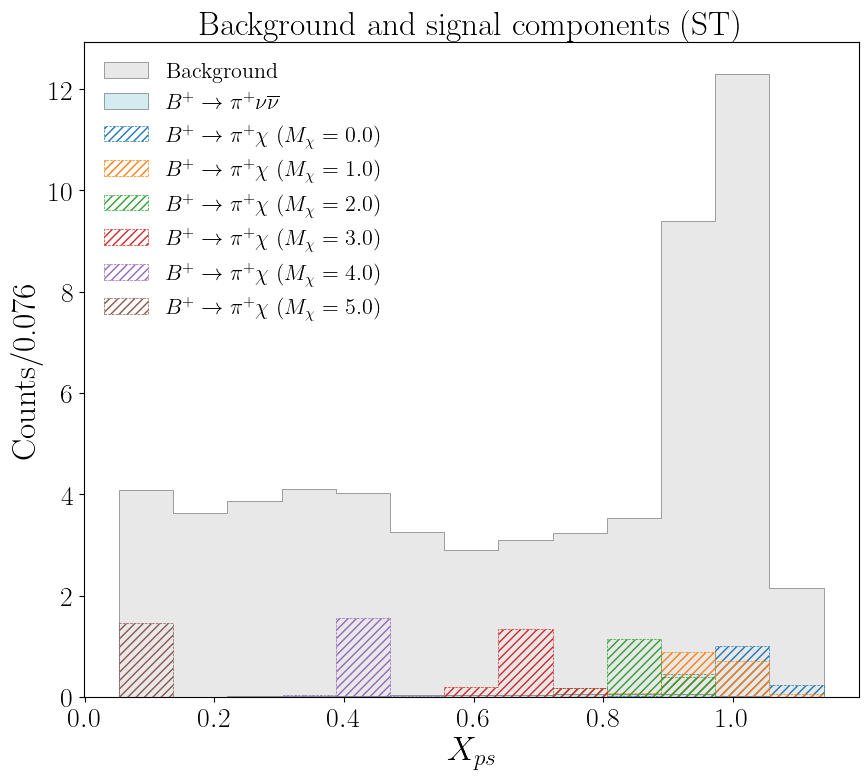

In [50]:
# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_Xps = SemilepTag_m00_df["Xps"]
SemilepTag_m10_Xps = SemilepTag_m10_df["Xps"]
SemilepTag_m20_Xps = SemilepTag_m20_df["Xps"]
SemilepTag_m30_Xps = SemilepTag_m30_df["Xps"]
SemilepTag_m40_Xps = SemilepTag_m40_df["Xps"]
SemilepTag_m50_Xps = SemilepTag_m50_df["Xps"]
pinunu = pinunu_Semi_df["Xps"]
bkg = bkg_df["Xps"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(pinunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(pinunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(pinunu) - np.min(pinunu)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 8.20e5
#Lumi = 50000
Lumi = 362
factor = 0.000009
factorbkg = Lumi / Limunosity

# Set histogram parameters
#nbins = 80
#range_limit = (0, 1.2)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
#bin_edges = 80

# Plot background and signal components
plt.hist(
    bkg,
    bins=bin_edges,
    label='Background',
    range=data_range,
    color='lightgray',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=factorbkg * np.ones_like(bkg),
    histtype='stepfilled',
    linewidth=0.5
)
plt.hist(
    pinunu,
    bins=bin_edges,
    label=r'$B^{+} \to \pi^{+} \nu \overline{\nu}$',
    range=data_range,
    color='lightblue',
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights= factorbkg * np.ones_like(pinunu),
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_Xps),
    (1.0, SemilepTag_m10_Xps),
    (2.0, SemilepTag_m20_Xps),
    (3.0, SemilepTag_m30_Xps),
    (4.0, SemilepTag_m40_Xps),
    (5.0, SemilepTag_m50_Xps),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to \\pi^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=0.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$X_{ps}$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_width,3)}", fontsize=24)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)

#plt.savefig(f'../Analysis/Plots/XpsSemilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

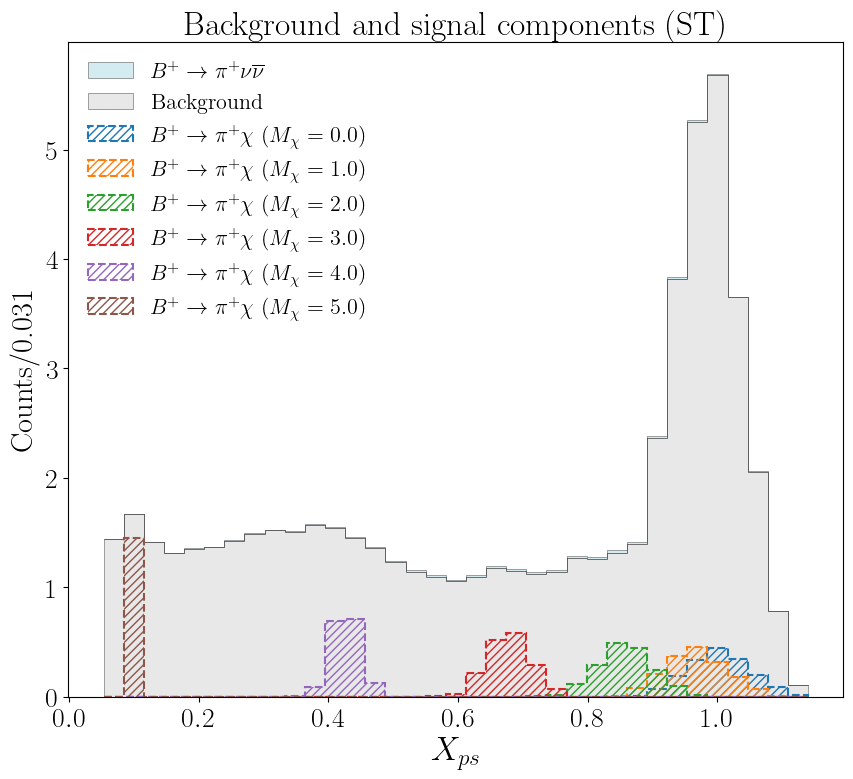

In [51]:
# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_Xps = SemilepTag_m00_df["Xps"]
SemilepTag_m10_Xps = SemilepTag_m10_df["Xps"]
SemilepTag_m20_Xps = SemilepTag_m20_df["Xps"]
SemilepTag_m30_Xps = SemilepTag_m30_df["Xps"]
SemilepTag_m40_Xps = SemilepTag_m40_df["Xps"]
SemilepTag_m50_Xps = SemilepTag_m50_df["Xps"]
pinunu = pinunu_Semi_df["Xps"]
bkg = bkg_df["Xps"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(pinunu, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(pinunu) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(pinunu) - np.min(pinunu)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 8.20e5
#Lumi = 50000
Lumi = 362
factor = 0.000009
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 35
#range_limit = (0, 1.2)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)
#bin_edges = 80

# Plot background and signal components
plt.hist(
    [bkg, pinunu],
    bins=bin_edges,
    label=['Background', r'$B^+ \to \pi^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(pinunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_Xps),
    (1.0, SemilepTag_m10_Xps),
    (2.0, SemilepTag_m20_Xps),
    (3.0, SemilepTag_m30_Xps),
    (4.0, SemilepTag_m40_Xps),
    (5.0, SemilepTag_m50_Xps),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to \\pi^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$X_{ps}$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_size,3)}", fontsize=22)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
#plt.savefig(f'../Analysis/Plots/XpsSemilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

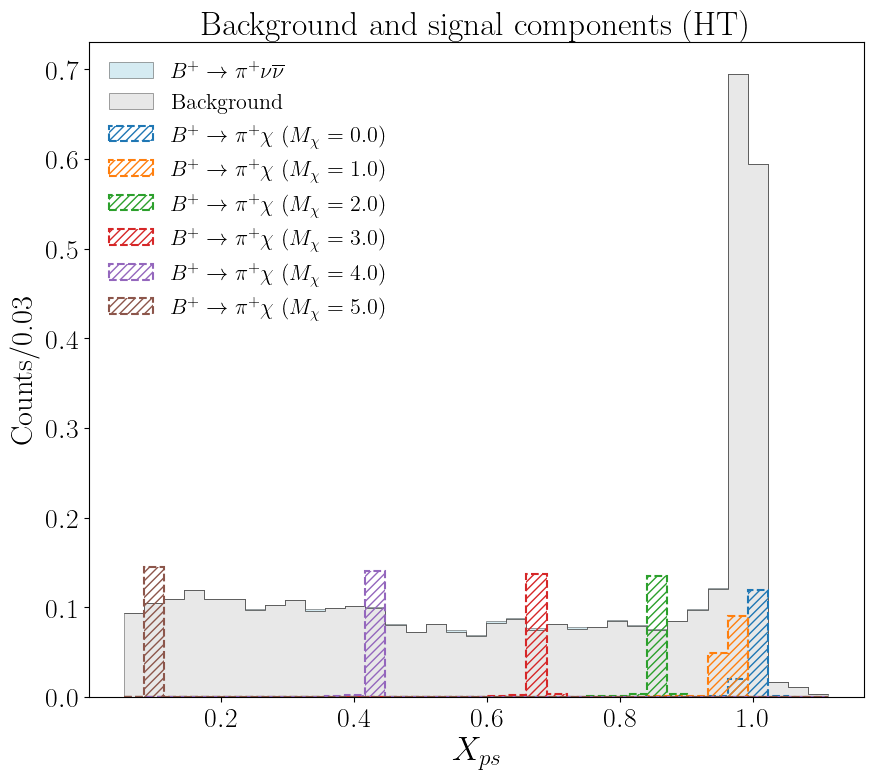

In [52]:
plt.figure(figsize=(10, 8.5))
# Extract data from pandas DataFrame
HadronicTag_m00_xps = HadronicTag_m00_df["Xps"]
HadronicTag_m10_xps = HadronicTag_m10_df["Xps"]
HadronicTag_m20_xps = HadronicTag_m20_df["Xps"]
HadronicTag_m30_xps = HadronicTag_m30_df["Xps"]
HadronicTag_m40_xps = HadronicTag_m40_df["Xps"]
HadronicTag_m50_xps = HadronicTag_m50_df["Xps"]
pinunu = pinunu_Had_df["Xps"]
bkg = bkgHad["Xps"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(bkg, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(bkg) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(bkg) - np.min(bkg)) / bin_width)


# Define luminosity and scaling factors
Limunosity = 8.20e5
#Lumi = 50000
Lumi = 362
factor = 0.0000008
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 35
#range_limit = (0, 1.1)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)

# Plot background and signal components
plt.hist(
    [bkg, pinunu],
    bins=nbins,
    label=['Background', r'$B^+ \to \pi^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(pinunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, HadronicTag_m00_xps),
    (1.0, HadronicTag_m10_xps),
    (2.0, HadronicTag_m20_xps),
    (3.0, HadronicTag_m30_xps),
    (4.0, HadronicTag_m40_xps),
    (5.0, HadronicTag_m50_xps),
]:
    plt.hist(
        data,
        bins=nbins,
        label=f'$B^+ \\to \\pi^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$X_{ps}$", fontsize=24)
plt.ylabel(f"Counts/{round(bin_size,3)}", fontsize=22)
plt.title("Background and signal components (HT)")
plt.legend(loc='upper left', fontsize=16, frameon=False)
#plt.savefig(f'../Analysis/Plots/XpsHadronic.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

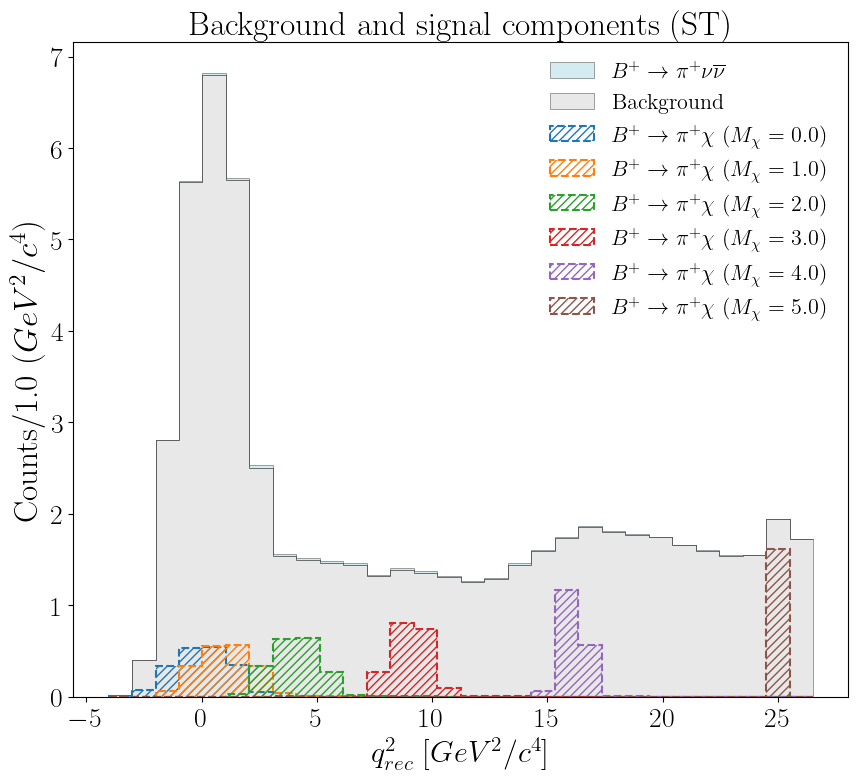

In [53]:
# Set plot size and use LaTeX for text rendering
plt.figure(figsize=(10, 8.5))
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size": 20, "font.family": "serif"})

# Extract data from pandas DataFrame
SemilepTag_m00_q2 = SemilepTag_m00_df["q2"]
SemilepTag_m10_q2 = SemilepTag_m10_df["q2"]
SemilepTag_m20_q2 = SemilepTag_m20_df["q2"]
SemilepTag_m30_q2 = SemilepTag_m30_df["q2"]
SemilepTag_m40_q2 = SemilepTag_m40_df["q2"]
SemilepTag_m50_q2 = SemilepTag_m50_df["q2"]
pinunu = pinunu_Semi_df["q2"]
bkg = bkg_df["q2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(bkg, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(bkg) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(bkg) - np.min(bkg)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 8.20e5
#Lumi = 50000
Lumi = 362
factor = 0.00001
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 30
#range_limit = (-3, 27)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)

# Plot background and signal components
plt.hist(
    [bkg, pinunu],
    bins=nbins,
    label=['Background', r'$B^+ \to \pi^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(pinunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, SemilepTag_m00_q2),
    (1.0, SemilepTag_m10_q2),
    (2.0, SemilepTag_m20_q2),
    (3.0, SemilepTag_m30_q2),
    (4.0, SemilepTag_m40_q2),
    (5.0, SemilepTag_m50_q2),
]:
    plt.hist(
        data,
        bins=nbins,
        label=f'$B^+ \\to \\pi^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$q^2_{rec}$ $[GeV^2/c^4]$", fontsize=22)
plt.ylabel(f"Counts/{round(bin_size,1)} $(GeV^2/c^4)$", fontsize=24)
plt.title("Background and signal components (ST)")
plt.legend(loc='upper right', fontsize=16, frameon=False)
#plt.savefig(f'../Analysis/Plots/q2Semilep.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

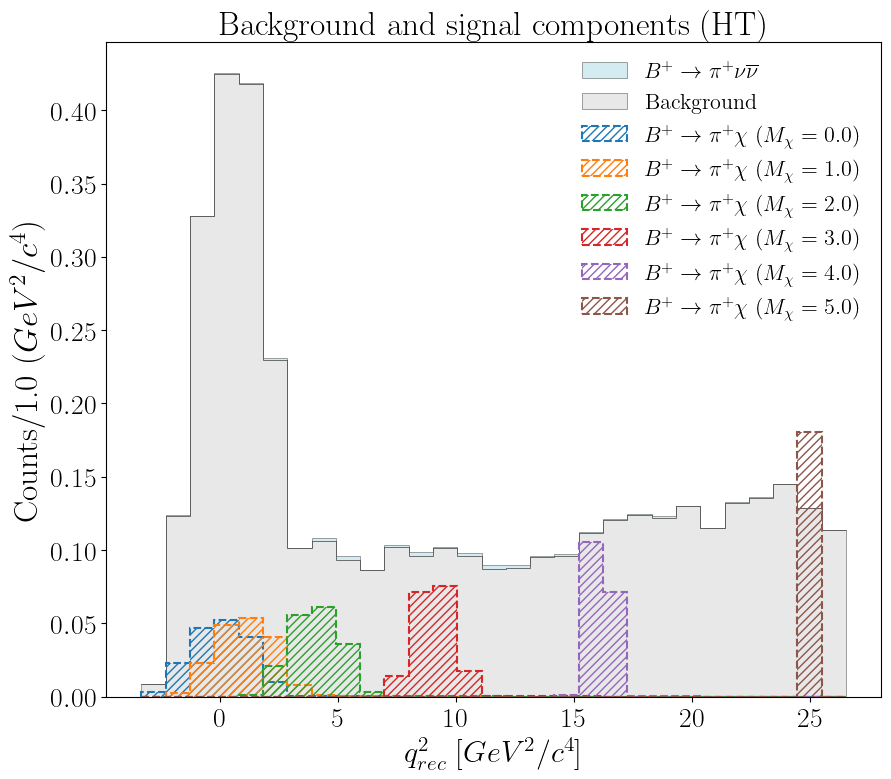

In [54]:
plt.figure(figsize=(10, 8.5))
# Extract data from pandas DataFrame
HadronicTag_m00_q2 = HadronicTag_m00_df["q2"]
HadronicTag_m10_q2 = HadronicTag_m10_df["q2"]
HadronicTag_m20_q2 = HadronicTag_m20_df["q2"]
HadronicTag_m30_q2 = HadronicTag_m30_df["q2"]
HadronicTag_m40_q2 = HadronicTag_m40_df["q2"]
HadronicTag_m50_q2 = HadronicTag_m50_df["q2"]
pinunu = pinunu_Had_df["q2"]
bkg = bkgHad["q2"]

# Calculate the interquartile range (IQR)
q75, q25 = np.percentile(bkg, [75 ,25])
iqr = q75 - q25

# Calculate the bin width using the Freedman-Diaconis rule
bin_width = 2 * iqr / (len(bkg) ** (1/3))

# Calculate the number of bins based on the bin width
nbins = int((np.max(bkg) - np.min(bkg)) / bin_width)

# Define luminosity and scaling factors
Limunosity = 8.20e5
#Lumi = 50000
Lumi = 362
factor = 0.000001
factorbkg = Lumi / Limunosity

# Set histogram parameters
nbins = 29
#range_limit = (-3, 28)

# Determine the range for the histograms based on your data
data_range = (np.min(bkg), np.max(bkg))

# Determine the bin edges for the histograms
bin_edges = np.linspace(data_range[0], data_range[1], nbins + 1)
bin_size =  abs((data_range[1] - data_range[0]) / nbins)

# Plot background and signal components
plt.hist(
    [bkg, pinunu],
    bins=bin_edges,
    label=['Background', r'$B^+ \to \pi^+ \nu \overline{\nu}$'],
    range=data_range,
    color=['lightgray', 'lightblue'],
    edgecolor='k',
    alpha=0.5,
    stacked=True,
    weights=[factorbkg * np.ones_like(bkg), factorbkg * np.ones_like(pinunu)],
    histtype='stepfilled',
    linewidth=0.5
)
# Customize each signal component
for mass, data in [
    (0.0, HadronicTag_m00_q2),
    (1.0, HadronicTag_m10_q2),
    (2.0, HadronicTag_m20_q2),
    (3.0, HadronicTag_m30_q2),
    (4.0, HadronicTag_m40_q2),
    (5.0, HadronicTag_m50_q2),
]:
    plt.hist(
        data,
        bins=bin_edges,
        label=f'$B^+ \\to \\pi^+ \\chi$ $(M_\\chi = {mass})$',
        range=data_range,
        histtype='step',
        linewidth=1.5,
        hatch='////',
        linestyle='dashed',
        weights=factor * np.ones_like(data),
    )

# Customize plot appearance
plt.xlabel("$q^2_{rec}$ $[GeV^2/c^4]$", fontsize=22)
plt.ylabel(f"Counts/{round(bin_size,1)} $(GeV^2/c^4)$", fontsize=24)
plt.title("Background and signal components (HT)")
plt.legend(loc='upper right', fontsize=16, frameon=False)
#plt.savefig(f'../Analysis/Plots/q2Hadronic.png', dpi=300,  bbox_inches = 'tight')
#plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()

In [55]:
HadronicTag_m00_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_m00_wc.csv')
HadronicTag_m10_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_m10_wc.csv')
HadronicTag_m20_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_m20_wc.csv')
HadronicTag_m30_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_m30_wc.csv')
HadronicTag_m40_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_m40_wc.csv')
HadronicTag_m50_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_m50_wc.csv')

HadronicTag_m00_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_gamma_m00_wc.csv')
HadronicTag_m10_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_gamma_m10_wc.csv')
HadronicTag_m20_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_gamma_m20_wc.csv')
HadronicTag_m30_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_gamma_m30_wc.csv')
HadronicTag_m40_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_gamma_m40_wc.csv')
HadronicTag_m50_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_gamma_m50_wc.csv')

HadronicTag_m00_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_pi0_m00_wc.csv')
HadronicTag_m10_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_pi0_m10_wc.csv')
HadronicTag_m20_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_pi0_m20_wc.csv')
HadronicTag_m30_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_pi0_m30_wc.csv')
HadronicTag_m40_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_pi0_m40_wc.csv')
HadronicTag_m50_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/HadronicTag_Dstar_pi0_m50_wc.csv')

In [ ]:
SemilepTag_m00_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_m00_wc.csv')
SemilepTag_m10_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_m10_wc.csv')
SemilepTag_m20_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_m20_wc.csv')
SemilepTag_m30_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_m30_wc.csv')
SemilepTag_m40_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_m40_wc.csv')
SemilepTag_m50_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_m50_wc.csv')

SemilepTag_m00_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_gamma_m00_wc.csv')
SemilepTag_m10_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_gamma_m10_wc.csv')
SemilepTag_m20_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_gamma_m20_wc.csv')
SemilepTag_m30_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_gamma_m30_wc.csv')
SemilepTag_m40_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_gamma_m40_wc.csv')
SemilepTag_m50_Dstar_gamma_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_gamma_m50_wc.csv')

SemilepTag_m00_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_pi0_m00_wc.csv')
SemilepTag_m10_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_pi0_m10_wc.csv')
SemilepTag_m20_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_pi0_m20_wc.csv')
SemilepTag_m30_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_pi0_m30_wc.csv')
SemilepTag_m40_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_pi0_m40_wc.csv')
SemilepTag_m50_Dstar_pi0_wc_df.to_csv('../Analysis/Files/CSV_Files/SemilepTag_Dstar_pi0_m50_wc.csv')

In [ ]:
BkgHtag_D.to_csv('../Analysis/Files/CSV_Files/BkgHtag_D_wc.csv')
BkgHtag_Dstar_gamma.to_csv('../Analysis/Files/CSV_Files/BkgHtag_Dstar_gamma_wc.csv')
BkgHtag_Dstar_pi0.to_csv('../Analysis/Files/CSV_Files/BkgHtag_Dstar_pi0_wc.csv')
BkgStag_D.to_csv('../Analysis/Files/CSV_Files/BkgStag_D_wc.csv')
BkgStag_Dstar_gamma.to_csv('../Analysis/Files/CSV_Files/BkgStag_Dstar_gamma_wc.csv')
BkgStag_Dstar_pi0.to_csv('../Analysis/Files/CSV_Files/BkgStag_Dstar_pi0_wc.csv')

#topoana_SemilepTagD_wc_df.to_csv('../Analysis/Files/CSV_Files/topoana_SemilepTagD_wc.csv')
